# **1. Descripción del proyecto: Análisis del mercado de videojuegos**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

**Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.**


**1.1 Diccionario de datos**

Descripción de datos:

* Name: Nombre del juego
* Platform: Plataforma
* Year_of_Release: Año de lanzamiento
* Genre: Género
* NA_sales: ventas en Norteamérica en millones de dólares estadounidenses
* EU_sales: ventas en Europa en millones de dólares estadounidenses
* JP_sales: ventas en Japón en millones de dólares estadounidenses
* Other_sales: ventas en otros países en millones de dólares estadounidenses
* Critic_Score: máximo de 100
* User_Score: máximo de 10
* Rating: ESRB

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Es posible que los datos de 2016 estén incompletos.

# **2. Objetivo:**

Definir los patrones para determinar si un juego puede tener éxito o no para ayudar en las proyecciones de inversiones comerciales de ventas y publicidad.

**2.1 Etapas:**

1.  Revisión y análisis de la base de datos: games.csv
2.  Procesamiento de bases de datos: revisión de estilo snake_case, validación de tipo de datos por dataset, valores duplicados explícitos e intrínsecos, valores ausentes, acciones tomadas para valores ausentes.
3.  Uniones y/o agrupaciones en caso de ser requeridas para los análisis.
4. Análisis general de las bases de datos: utilización de gráficos y estadísticas descriptivas.
5. Análisis estadístico: definición de hipótesis, pruebas de probabilidad, recomendaciones estadísticas.
6. Conclusiones

# **3. Revisión y análsis de la base de datos**

**3.1 Carga de librerías**

In [160]:
# Cargar todas las librerías

try:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    from math import factorial
    from scipy import stats as st
    from matplotlib import pyplot as plt
    print('Librerías cargadas correctamente')

except:
    print('Error al cargar librerias')

Librerías cargadas correctamente


**3.2 Carga de datos**

In [161]:
# Cargar los datos

try:

    games = pd.read_csv('games.csv')
    print('Datos cargados correctamente')

except:
    print('Error al cargar los datos')


Datos cargados correctamente


**3.3 Revisión de los datos**

In [162]:
# Información general/resumida sobre el DataFrame

print('Información dataset "games":')
print()
print(games.info())

Información dataset "games":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [163]:
# Muestra de los datos del dataset

print('Muestra de los datos en el dataset:')
print()
print(games.head(10))

Muestra de los datos en el dataset:

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08 

In [164]:
# Valores unicos por columna 'Platform'

print('Valores únicos en la columna "Platform":')

print()

print(games['Platform'].unique())


Valores únicos en la columna "Platform":

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [165]:
# Valores unicos por columna 'Genre'

print('Valores únicos en la columna "Genre":')

print()

print(games['Genre'].unique())


Valores únicos en la columna "Genre":

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [166]:
# Valores unicos por columna 'Rating'

print('Valores únicos en la columna "Rating":')

print()

print(games['Rating'].unique())

Valores únicos en la columna "Rating":

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**3.4 Observaciones del dataset:**

* 11 columnas, sin estilo snake_case, es necesario cambiar por estilo snake_case
* 16,715 filas, con datos ausentes en varias columnas:
    * Name: 2 valores
    * Year_of_release: 269 valores ausentes
    * Genre: 2 valores ausentes
    * Critic_score: 8,578 valores ausentes
    * User_score: 6,701 valores ausentes
    * Rating: 6,766 valores ausentes
    * Platform, NA_sales, EU_sales, JP_sales, Other_sales: sin valores ausentes
* Year_of_release: cambiar el tipo de dato de float a int
* User_score: cambiar el tipo de dato de object a float
* Se revisaron los valores únicos de las columnas “Platform”,  “Genre”,  “Rating”, para validar que no se encontraran valores similares escritos de forma diferente.


**3.5 Modificaciones del dataset**

**3.5.1 Cambio de titulos a snake case**

In [167]:
# Corrección de nombres de columnas a snake_case

new_columns_names =[]  # Lista vacia para nombres corregidos

for titles in games.columns:   # Iteración de nombres de columnas y cambio a minúsculas
    name_lowered = titles.lower()
    new_columns_names.append(name_lowered)

games.columns = new_columns_names   # Asignación de nombres corregidos

print(games.head(1))

         name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii           2006.0  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E  


**3.5.2 Valores ausentes**

**Columna: name**

In [168]:
# Identificacion de valores ausentes columna 'name'

print('Valores ausentes columna "name":', games['name'].isna().sum())
print()

nombres_ausentes = games[games['name'].isna()]

print(nombres_ausentes)

Valores ausentes columna "name": 2

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


**Valores ausentes: Name**

Se encuentran dos juegos con valores ausentes, de los cuales no se cuenta con más información que plataforma, año de lanzamiento y ventas.

Se cambiarán los valores ausentes por "unknown" (desconocido).

In [169]:
# Asignación de "unknown" a los valores ausentes de la columna 'name'

games['name']= games['name'].fillna('unknown')

print('Valores ausentes columna "name":', games['name'].isna().sum())

Valores ausentes columna "name": 0


**Columna: platform**

No cuenta con valores ausentes.

In [170]:
# Identificacion de valores ausentes

print('Valores ausentes columna "platform":', games['platform'].isna().sum())


Valores ausentes columna "platform": 0


**Columna: year_of_release**

In [171]:
# Identificacion de valores ausentes

print('Valores ausentes columna "year_of_release":', games['year_of_release'].isna().sum())
print()

year_ausentes = games[games['year_of_release'].isna()]

print(year_ausentes.head())

Valores ausentes columna "year_of_release": 269

                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN  


**Valores ausentes: year_of_release**

269 valores ausentes, estos serán sustituidos por el valor 0 “cero”, esto nos servirá para identificar los juegos que no tienen registro de su año de lanzamiento.

Se cambia el tipo de valores por int.

In [172]:
# Asignación de 0 "cero" a los valores ausentes de la columna 'year_of_release' y cambio a tipo 'int'

games['year_of_release'] = games['year_of_release'].fillna(0)

games['year_of_release'] = games['year_of_release'].astype(int)

print('Valores ausentes columna "year_of_release":', games['year_of_release'].isna().sum())
print('Tipo de valores en la columna "year_of_release":', games['year_of_release'].dtypes)
print()

year_cero = games[games['year_of_release'] == 0]

print(year_cero.head())


Valores ausentes columna "year_of_release": 0
Tipo de valores en la columna "year_of_release": int64

                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2                0    Sports      4.26   
377            FIFA Soccer 2004      PS2                0    Sports      0.59   
456  LEGO Batman: The Videogame      Wii                0    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2                0  Fighting      1.57   
609              Space Invaders     2600                0   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN      

**Columna: genre**

In [173]:
# Identificacion de valores ausentes

print('Valores ausentes columna "genre":', games['genre'].isna().sum())
print()

genre_ausentes = games[games['genre'].isna()]

print(genre_ausentes.head())

Valores ausentes columna "genre": 2

          name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    unknown      GEN             1993   NaN      1.78      0.53      0.00   
14244  unknown      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


**Valores ausentes: genre**

2 valores ausentes, mismos juegos que carecen de nombre, en este caso se asignara “unknown” para estos valores.


In [174]:
# Asignación de "unknown" a los valores ausentes de la columna 'genre'

games['genre']= games['genre'].fillna('unknown')

print('Valores ausentes columna "genre":', games['genre'].isna().sum())
print()
print(games['genre'].unique())

Valores ausentes columna "genre": 0

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'unknown']


**Columna: critic_score**

In [175]:
# Identificacion de valores ausentes

print('Valores ausentes columna "critic_score":', games['critic_score'].isna().sum())
print()

critic_ausentes = games[games['critic_score'].isna()]

print(critic_ausentes.head())

Valores ausentes columna "critic_score": 8578

                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN  


Histograma valores critic_score:



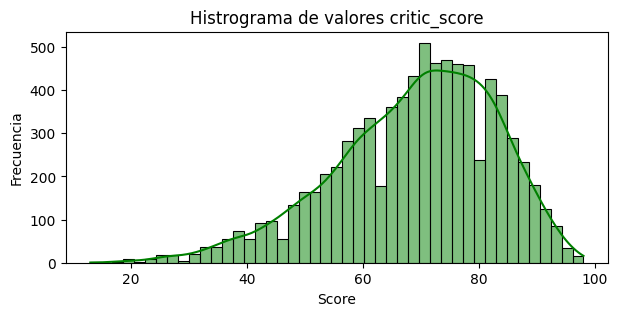

In [176]:
# Histograma de valores de critic_score

print('Histograma valores critic_score:')
print()

plt.figure(figsize=(7,3))

sns.histplot(games['critic_score'], kde=True, color='green', line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Histrograma de valores critic_score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

plt.show()

**Valores ausentes: critic_score**

8,578 valores ausentes, para tratar estos valores se realizará lo siguiente:

* La distribución de los valores de “critic_score” tienen una distribución sesgada, por lo que se tomará el valor de la “mediana” para complementar los valores ausentes.
* Calculo de mediana de “critic_score” por “genre”, utilizando groupby()
* Crear una función que asigne el valor de la mediana de “critic_score” por cada “genre” a los valores ausentes de cada juego
* Se cuenta con dos registros que no se conoce su “genre” ni “critic_score” estos se cambian por el valor mínimo.


In [177]:
# Valor mediana de critic_score por genero de juego

critic_genero_median = round(games.groupby('genre')['critic_score'].median(),2)

print('Valor "mediana" critic_score por género de juego:\n\n', critic_genero_median)
print()
print('Valor mínimo critic_score:', games['critic_score'].min())
print('Valor máximo critic_score:', games['critic_score'].max())
print('Valor promedio critic_score:', round(games['critic_score'].mean(),2))

Valor "mediana" critic_score por género de juego:

 genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
unknown          NaN
Name: critic_score, dtype: float64

Valor mínimo critic_score: 13.0
Valor máximo critic_score: 98.0
Valor promedio critic_score: 68.97


In [178]:
# crear función para asignar la mediana de critic_score por cada genero a los valores ausentes de critic_score

def asignar_mediana(row):

    """Asigna la mediana de critic_score por género a los valores ausentes de critic_score"""

    return critic_genero_median[row['genre']] if pd.isna(row['critic_score']) else row['critic_score']

# Aplicar la función

games['critic_score'] = games.apply(asignar_mediana, axis=1)

# Cambiar los valores del "genre = unknown" por el valor mínimo de critic_score

games['critic_score'] = games['critic_score'].fillna(13)

print('Valores ausentes columna "critic_score":', games['critic_score'].isna().sum())
print()
print(games['critic_score'].dtype)

Valores ausentes columna "critic_score": 0

float64


**Columna: user_score**

In [179]:
# Identificacion de valores ausentes

print('Valores ausentes columna "user_score":', games['user_score'].isna().sum())
print()

user_ausentes = games[games['user_score'].isna()]

print(user_ausentes.head())

Valores ausentes columna "user_score": 6701

                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77          69.0        NaN    NaN  
4      11.27      8.89     10.22         1.00          74.0        NaN    NaN  
5      23.20      2.26      4.22         0.58          70.0        NaN    NaN  
9      26.93      0.63      0.28         0.47          73.0        NaN    NaN  
10      9.05     10.95      1.93         2.74          70.0        NaN    NaN  


In [180]:
# Valores únicos de user_score

print('Valores únicos user_score:\n\n', games['user_score'].unique())
print()

filtro_user_tbd = games[games['user_score']== 'tbd']

print('Juegos con "tbd" en user_score:\n\n', filtro_user_tbd['user_score'].count())

Valores únicos user_score:

 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Juegos con "tbd" en user_score:

 2424


**Valores ausentes: user_score**

6,701 valores ausentes.

Se detectaron 2,424 valores con la cadena “tbd”, probablemente se postergó el registro de la evaluación del usuario o no se cuenta con este valor.

La distribución de los valores de “user_score” tienen una distribución sesgada, por lo que se tomará el valor de la “mediana” para complementar los valores ausentes.

Se realiza lo siguiente:

* Sustitución de la cadena “tbd” por valores ausentes.
* Reconteo de valores ausentes.
* Cálculo de la mediana de “user_score” por “genre”, utilizando groupby()
* Crear una función que asigne el valor de la mediana de “user_score” por cada “genre” a los valores ausentes de cada juego
* Se cuenta con dos registros que no se conoce su “genre” ni “user_score” estos valores se cambian por el valor mínimo de user_score.
* Cambio del tipo de valor por float


In [181]:
# Remplazar "tbd" por valores ausentes

games['user_score'] = games['user_score'].replace('tbd', np.nan)

games['user_score'] = games['user_score'].astype(float)   # Cambiar valores a float

print('Valores únicos user_score:\n\n', games['user_score'].unique())
print()
print('Valores ausentes columna "user_score":', games['user_score'].isna().sum())


Valores únicos user_score:

 [8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]

Valores ausentes columna "user_score": 9125


Histograma valores user_score:


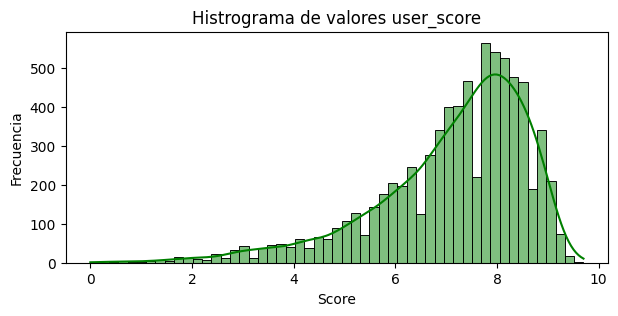

In [182]:
# Histograma valores user_score

print('Histograma valores user_score:')

plt.figure(figsize=(7,3))

sns.histplot(games['user_score'], kde=True, color='green', line_kws={'color':'red'})  # histograma con curva de densidades

plt.title('Histrograma de valores user_score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

plt.show()

In [183]:
# Valor mediana de user_score por genero de juego

user_genero_median = round(games.groupby('genre')['user_score'].median(),2)

print('Valor "mediana" user_score por genero de juego:\n\n', user_genero_median)
print()
print('Valor mínimo user_score:', games['user_score'].min())
print('Valor máximo user_score:', games['user_score'].max())
print('Valor promedio user_score:', round(games['user_score'].mean(),2))

Valor "mediana" user_score por genero de juego:

 genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
unknown         NaN
Name: user_score, dtype: float64

Valor mínimo user_score: 0.0
Valor máximo user_score: 9.7
Valor promedio user_score: 7.13


In [184]:
# crear función para asignar la mediana de user_score por cada genero a los valores ausentes de user_score

def asignar_mediana_user(row):
    return user_genero_median[row['genre']] if pd.isna(row['user_score']) else row['user_score']

# Aplicar la función

games['user_score'] = games.apply(asignar_mediana_user, axis=1)

# Cambiar los valores del "genre = unknown" por el valor mínimo de user_score

games['user_score'] = games['user_score'].fillna(0.0)

print('Valores ausentes columna "user_score":', games['user_score'].isna().sum())
print()

print(games['user_score'].dtype)

Valores ausentes columna "user_score": 0

float64


**Columna: rating**

In [185]:
# Identificacion de valores ausentes

print('Valores ausentes columna "rating":', games['rating'].isna().sum())
print()

rating_ausentes = games[games['rating'].isna()]

print(rating_ausentes.head())

Valores ausentes columna "rating": 6766

                        name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77          69.0         7.7    NaN  
4      11.27      8.89     10.22         1.00          74.0         7.8    NaN  
5      23.20      2.26      4.22         0.58          70.0         7.5    NaN  
9      26.93      0.63      0.28         0.47          73.0         7.4    NaN  
10      9.05     10.95      1.93         2.74          70.0         7.5    NaN  


In [186]:
# Identificacion de valores ausentes

pre_esbr = games[games['year_of_release'] < 1994]

print('Juegos previos a la creación de la ESBR (1994):\n\n', pre_esbr['year_of_release'].count())


Juegos previos a la creación de la ESBR (1994):

 636


**Valores ausentes: rating**

6,766 valores ausentes.

636 juegos son de años anteriores a la creación de la ESBR (1994), el resto puede ser que se registró previo a recibir la clasificación oficial por parte del organismo.

Existe una cantidad de juegos japoneses que no cuentan con clasificación ESBR, es posible que estos juegos no hayn sido lanzados fuera de Japón, y por otra parte Japón cuenta con su propio organismo de clasificación de juegos llamado CERO.

Se registra ‘unknown’ a los valores ausentes ya que no podemos definir una clasificación justa para cada juego sin contar con la información oficial.


In [187]:
# Asignación de "unknown" a los valores ausentes

games['rating']= games['rating'].fillna('unknown')

print('Valores ausentes columna "rating":', games['rating'].isna().sum())
print()
print(games['rating'].unique())

Valores ausentes columna "rating": 0

['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Validación de información del dataset**

In [188]:
print('Información del dataset despúes de los primeros ajustes:\n\n')

print(games.info())

Información del dataset despúes de los primeros ajustes:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


**3.5.3 Valores duplicados**

No se cuenta con lineas duplicadas en el dataset games.

In [189]:
# Identificar valores duplicados

print('Lineas duplicados del dataset:', games.duplicated().sum())

Lineas duplicados del dataset: 0


**3.5.4 Datos adicionales**

* Agregar columna "total_sales"

In [190]:
# Agregar columna "total_sales" que suma las ventas de todas las regiones por juego

# Función para relizar la suma por linea

def ventas_tot (row):
    na_sales = row['na_sales']
    eu_sales = row['eu_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    ventas_totales = na_sales + eu_sales + jp_sales + other_sales
    return ventas_totales

games['total_sales'] = games.apply(ventas_tot, axis=1)

print('Dataset con columna "total_sales":\n\n', games.head())
print()
print(games.info())

Dataset con columna "total_sales":

                        name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          69.0         7.7  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          74.0         7.8  unknown   

   total_sales  
0        82.54  
1  

# **4. Análisis de datos**

**4.1 Juegos lanzados por año**

In [191]:
# Agrupación de juegos por año

games_with_year = games[games['year_of_release'] > 0 ]   # Solo se consideran los juegos de los que se conoce el año de lanzamiento

games_por_año = games_with_year.groupby('year_of_release')['name'].count()

print(games_por_año)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


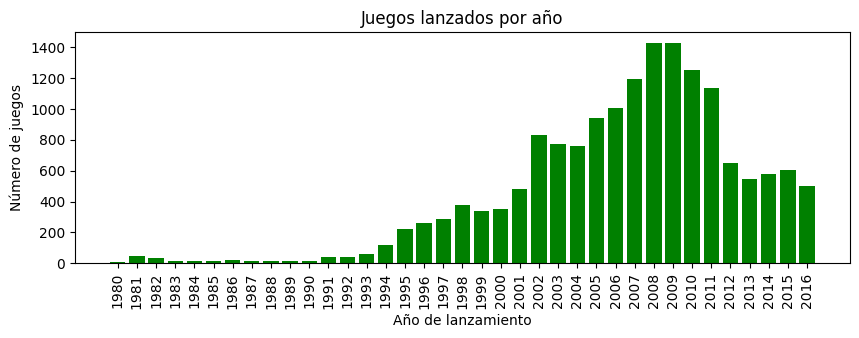

In [192]:
# Gráfica de barras con la cantidad de juegos lanzados por año

plt.figure(figsize=(10,3))
plt.bar(games_por_año.index, games_por_año.values, color='green')
plt.xlabel('Año de lanzamiento', fontsize=10)
plt.ylabel('Número de juegos')
plt.title('Juegos lanzados por año')
plt.xticks(np.arange(games_por_año.index.min(), games_por_año.index.max()+1, 1), rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

**Comentarios: Juegos lanzados por año**

* Existe una tendencia incremental del lanzamiento de juegos a partir de 1994.
* De 2002 al 2011, es el periodo con mayor número de lanzamientos en la industria.
* 2008 y 2009 son los años pico en número de lanzamientos con mas de 1,400 juegos lanzados por año.
* En 2012 se presenta una caída significativa de lanzamientos, de 1,136 lanzados en 2011, en 2012 solo se registraron 653.
* A partir de 2012 a 2016 el número de lanzamientos es similar oscilando entre los 600 y 500 juegos por año.




**4.2 Ventas por plataforma**

In [193]:
# Calcular las ventas totales por plataforma

ventas_plataforma = games_with_year.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

print(ventas_plataforma)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


**4.2.1 Selección top plataformas**

In [194]:
# Filtrar las plataformas que fueron lanzadas a partir del año 2000 y vendieron mas de $500 mio dls

top_plataforma_ventas = games_with_year[games_with_year['year_of_release'] >= 2000]

top_plataforma_ventas = top_plataforma_ventas.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

top_plataforma_ventas = top_plataforma_ventas[top_plataforma_ventas['total_sales'] >= 500]

print('TOP PLATAFORMAS: lanzadas a partir del año 2000 con mas de $500 mio dls en ventas:\n\n', top_plataforma_ventas.head(10))

TOP PLATAFORMAS: lanzadas a partir del año 2000 con mas de $500 mio dls en ventas:

           total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.76


In [195]:
# Filtrado de top plataformas

top_plataformas = ['PS2','X360','PS3','Wii','DS']

filtro_top_plataformas = games_with_year[games_with_year['platform'].isin(top_plataformas)]

print('Muestra ventas por año de top plataformas:\n\n', filtro_top_plataformas.head())
print()
print('Validación de plataformas consideradas:\n\n', filtro_top_plataformas['platform'].unique())


Muestra ventas por año de top plataformas:

                     name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80 

In [196]:
# Ventas por año de las top plataformas

ventas_año_top_plataformas = filtro_top_plataformas.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(drop=False)

ventas_año_top_plataformas = ventas_año_top_plataformas[ventas_año_top_plataformas['year_of_release']!= 1985]  # filtro de eliminación del registro de DS de 1985

print(ventas_año_top_plataformas.head(20))

   platform  year_of_release  total_sales
1        DS             2004        17.27
2        DS             2005       130.14
3        DS             2006       119.81
4        DS             2007       146.94
5        DS             2008       145.31
6        DS             2009       119.54
7        DS             2010        85.02
8        DS             2011        26.18
9        DS             2012        11.01
10       DS             2013         1.54
11      PS2             2000        39.17
12      PS2             2001       166.43
13      PS2             2002       205.38
14      PS2             2003       184.31
15      PS2             2004       211.81
16      PS2             2005       160.66
17      PS2             2006       103.42
18      PS2             2007        75.99
19      PS2             2008        53.90
20      PS2             2009        26.40


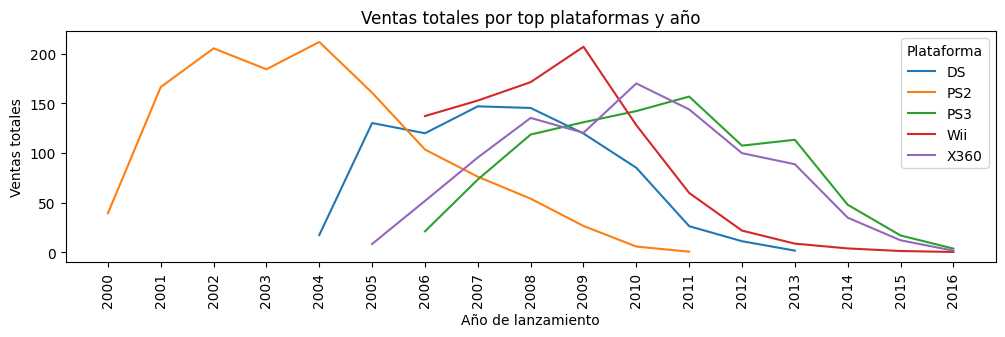

In [197]:
# Gráfica de lineas de ventas por año por plataforma

plt.figure(figsize=(12,3))
sns.lineplot(data=ventas_año_top_plataformas, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel('Año de lanzamiento', fontsize=10)
plt.ylabel('Ventas totales')
plt.title('Ventas totales por top plataformas y año')
plt.legend(title='Plataforma')
plt.xticks(np.arange(ventas_año_top_plataformas['year_of_release'].min(), ventas_año_top_plataformas['year_of_release'].max()+1, 1), rotation=90)
plt.show()

**Comentarios: Ventas por plataforma**

De acuerdo con el total de ventas registradas por plataforma el PS2 se encuentra en primer lugar con \$1,233.56 mio de dls, seguido por X360 con \$961.24 mio dls, una diferencia considerable entre el primer y segundo lugar.

Para el análisis del comportamiento de ventas de cada plataforma se seleccionarán las plataformas que vendieron mas de $500 mio de dls, entre las cuales tenemos a: PS2, X360, PS3, Wii, DS, PS.

En la gráfica “Ventas totales por plataforma por año” podemos observar el comportamiento general de cada una de estas, las curvas de ventas de inicio a fin, así como los picos de mayor venta, que de igual forma se pueden interpretar como los ciclos de vida de cada una de estas.

Se realizarán los filtrados de información por cada plataforma, así como los análisis gráficos y estadísticos respectivos a continuación.


**4.3 Análisis por plataforma**

**4.3.1 Análisis PS2**

In [198]:
# 1. Años activos, maximo y minimo de ventas por top plataformas

# PS2

ps2_vta = ventas_año_top_plataformas[ventas_año_top_plataformas['platform']== 'PS2']

ps2_tot_vta = ps2_vta['total_sales'].sum()

ps2_max_vta = ps2_vta['total_sales'].max()

ps2_min_vta = ps2_vta['total_sales'].min()

ps2_mean_vta = ps2_vta['total_sales'].mean()

ps2_años_con_vta = ps2_vta['year_of_release'].count()

print('Ventas totales (mio usd) alcanzadas por PS2: $', round(ps2_tot_vta,2))
print()
print('Ventas máximas (mio usd) alcanzadas en un año por PS2: $', round(ps2_max_vta,2))
print()
print('Ventas mínimas (mio usd) alcanzadas en un año por PS2: $', round(ps2_min_vta,2))
print()
print('Ventas promedio (mio usd) anuales alcanzadas por PS2: $', round(ps2_mean_vta,2))
print()
print('Número de años con ventas registradas por PS2:', ps2_años_con_vta)
print()


Ventas totales (mio usd) alcanzadas por PS2: $ 1233.56

Ventas máximas (mio usd) alcanzadas en un año por PS2: $ 211.81

Ventas mínimas (mio usd) alcanzadas en un año por PS2: $ 0.45

Ventas promedio (mio usd) anuales alcanzadas por PS2: $ 102.8

Número de años con ventas registradas por PS2: 12



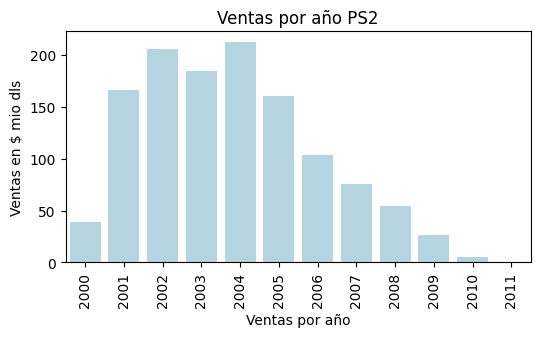


Ventas por año PS2:

   platform  year_of_release  total_sales
11      PS2             2000        39.17
12      PS2             2001       166.43
13      PS2             2002       205.38
14      PS2             2003       184.31
15      PS2             2004       211.81
16      PS2             2005       160.66
17      PS2             2006       103.42
18      PS2             2007        75.99
19      PS2             2008        53.90
20      PS2             2009        26.40
21      PS2             2010         5.64
22      PS2             2011         0.45


In [199]:
# 2. Gráfica de barras ventas por año

# PS2

plt.figure(figsize=(6,3))
sns.barplot(x=ps2_vta['year_of_release'], y=ps2_vta['total_sales'], color='lightblue')
plt.xlabel('Ventas por año', fontsize=10)
plt.ylabel('Ventas en $ mio dls')
plt.title('Ventas por año PS2')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()
print('Ventas por año PS2:')
print()
print(ps2_vta)

Estadisticas rápidas ventas totales PS2:

 count    2127.000000
mean        0.579953
std         1.138461
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

Diagrama de caja ventas totales PS2:



Text(0.5, 1.0, 'PS2: gráfico de caja ventas totales')

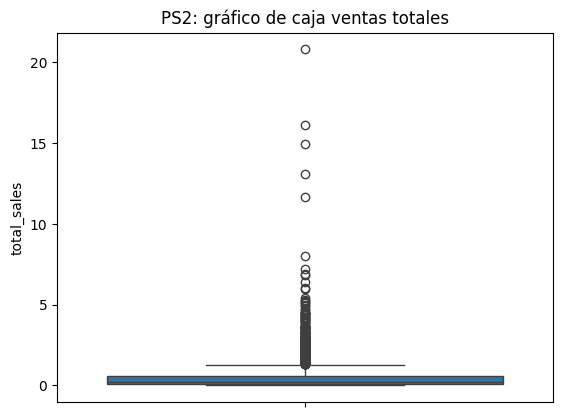

In [200]:
# 3. Traza un diagrama de caja para visualizar la distribución de las ventas

#PS2

ps2_juegos = filtro_top_plataformas[filtro_top_plataformas['platform'] == 'PS2']

print('Estadisticas rápidas ventas totales PS2:\n\n', ps2_juegos['total_sales'].describe())
print()

print('Diagrama de caja ventas totales PS2:')
print()

sns.boxplot(ps2_juegos['total_sales'])

plt.title('PS2: gráfico de caja ventas totales')

Ventas totales PS2 zona NA: 572.92

Ventas totales PS2 zona EU: 332.63

Ventas totales PS2 zona JP: 137.54

Ventas totales PS2 zona Other: 190.47



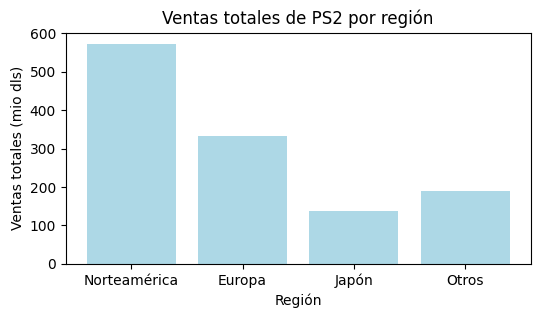

In [201]:
# 4. Ventas totales por país

# PS2

ps2_vtas_na = round(ps2_juegos['na_sales'].sum(),2)

ps2_vtas_eu = round(ps2_juegos['eu_sales'].sum(),2)

ps2_vtas_jp = round(ps2_juegos['jp_sales'].sum(),2)

ps2_vtas_other = round(ps2_juegos['other_sales'].sum(),2)

print('Ventas totales PS2 zona NA:', ps2_vtas_na)
print()
print('Ventas totales PS2 zona EU:', ps2_vtas_eu)
print()
print('Ventas totales PS2 zona JP:', ps2_vtas_jp)
print()
print('Ventas totales PS2 zona Other:', ps2_vtas_other)
print()

PS2_vtas_region = [ps2_vtas_na, ps2_vtas_eu, ps2_vtas_jp, ps2_vtas_other]

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, PS2_vtas_region, color='lightblue')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales de PS2 por región')

plt.show()

Ventas totales ($ mio dls) registradas por género de juego en PS2:

genre
Action          272.38
Sports          262.67
Racing          154.33
Shooter         108.20
Misc             98.63
Role-Playing     91.61
Fighting         89.20
Platform         72.13
Simulation       42.26
Adventure        21.24
Strategy         14.97
Puzzle            5.94
Name: total_sales, dtype: float64



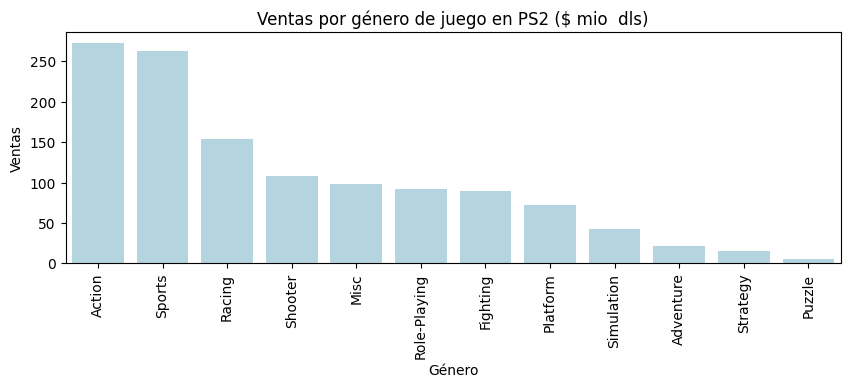

In [202]:
# 5. Ventas por genero de juegos por año

# PS2

ps2_vtas_genero = ps2_juegos.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

print('Ventas totales ($ mio dls) registradas por género de juego en PS2:')
print()
print(ps2_vtas_genero)
print()

plt.figure(figsize=(10,3))
sns.barplot(x=ps2_vtas_genero.index, y=ps2_vtas_genero.values, color='lightblue')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por género de juego en PS2 ($ mio  dls)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Ventas registradas por género por año en PS2:

     year_of_release      genre  total_sales
0               2000     Action         3.39
1               2000  Adventure         0.15
2               2000   Fighting         7.89
3               2000       Misc         0.05
4               2000   Platform         0.38
..               ...        ...          ...
125             2010     Sports         3.10
126             2011     Action         0.06
127             2011  Adventure         0.03
128             2011   Fighting         0.10
129             2011     Sports         0.26

[130 rows x 3 columns]



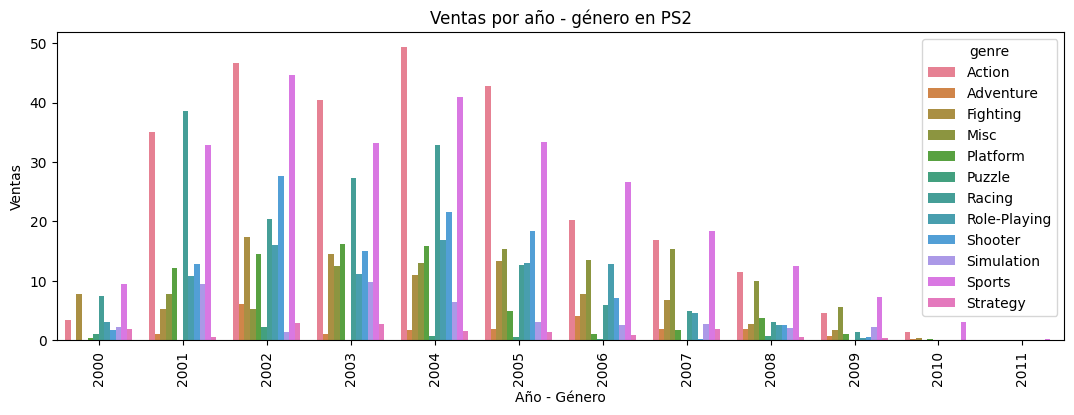

In [203]:
# 6. Ventas por genero de juegos por año

# PS2

ps2_vtas_genero_año = ps2_juegos.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()

print('Ventas registradas por género por año en PS2:')
print()
print(ps2_vtas_genero_año)
print()

plt.figure(figsize=(13,4))
sns.barplot(x='year_of_release', y='total_sales', hue='genre', data= ps2_vtas_genero_año)
plt.xlabel('Año - Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por año - género en PS2')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Juegos registrados con venta por año en PS2:

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64



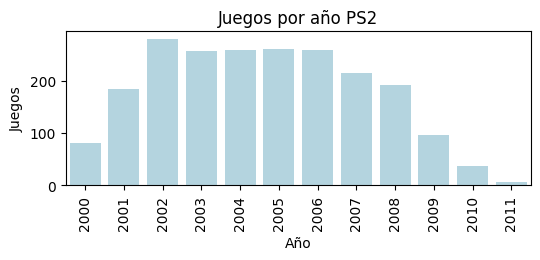

In [204]:
# 7. Cantidad de juegos con ventas por plataforma

# PS2

ps2_juegos_año = ps2_juegos.groupby('year_of_release')['name'].count()

print('Juegos registrados con venta por año en PS2:')
print()
print(ps2_juegos_año)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=ps2_juegos_año.index, y=ps2_juegos_año.values, color='lightblue')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Juegos')
plt.title('Juegos por año PS2')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Juegos por género lanzados en PS2:

genre
Sports          391
Action          345
Misc            218
Racing          212
Adventure       196
Role-Playing    183
Shooter         158
Fighting        146
Platform        101
Simulation       89
Strategy         70
Puzzle           18
Name: name, dtype: int64



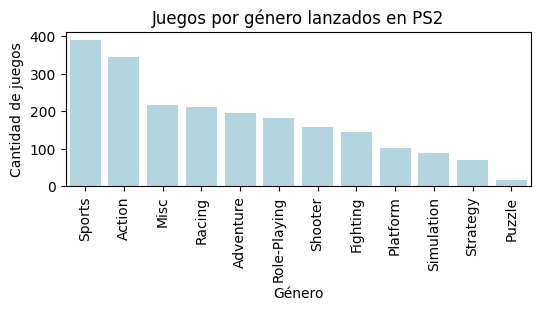

In [205]:
# 8. Cantidad de juegos lanzados por genero

# PS2

ps2_juegos_genero = ps2_juegos.groupby('genre')['name'].count().sort_values(ascending=False)

print('Juegos por género lanzados en PS2:')
print()
print(ps2_juegos_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=ps2_juegos_genero.index, y=ps2_juegos_genero.values, color='lightblue')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por género lanzados en PS2')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [206]:
# 9. Análisis de las evaluaciones de los juegos

# PS2

ps2_critic_mean = ps2_juegos['critic_score'].mean()

ps2_critic_max = ps2_juegos['critic_score'].max()

ps2_critic_min = ps2_juegos['critic_score'].min()

ps2_user_mean = ps2_juegos['user_score'].mean()

ps2_user_max = ps2_juegos['user_score'].max()

ps2_user_min = ps2_juegos['user_score'].min()

print('Critic score promedio:', ps2_critic_mean)
print()
print('Critic score máximo:', ps2_critic_max)
print()
print('Critic score mínimo:', ps2_critic_min)
print()
print('User score promedio:', ps2_user_mean)
print()
print('User score máximo:', ps2_user_max)
print()
print('User score mínimo:', ps2_user_min)
print()


Critic score promedio: 69.37329572167371

Critic score máximo: 97.0

Critic score mínimo: 24.0

User score promedio: 7.5519981194170205

User score máximo: 9.5

User score mínimo: 1.7



In [207]:
# 10. Análisis de las evaluaciones de los juegos por género

# PS2

ps2_critic_genre = round(ps2_juegos.groupby('genre')['critic_score'].mean(),2).sort_values(ascending=False)

ps2_user_genre = round(ps2_juegos.groupby('genre')['user_score'].mean(),2).sort_values(ascending=False)

print('Critic score promedio por género:\n\n')
print()
print(ps2_critic_genre)
print()
print('User score promedio por género:\n\n')
print()
print(ps2_user_genre)


Critic score promedio por género:



genre
Sports          73.49
Role-Playing    72.42
Puzzle          71.61
Strategy        71.23
Fighting        71.06
Simulation      70.36
Misc            68.51
Shooter         67.65
Racing          67.36
Action          67.23
Platform        67.13
Adventure       65.20
Name: critic_score, dtype: float64

User score promedio por género:



genre
Simulation      7.80
Role-Playing    7.80
Fighting        7.76
Strategy        7.73
Action          7.58
Shooter         7.57
Sports          7.55
Platform        7.52
Adventure       7.51
Racing          7.49
Puzzle          7.48
Misc            7.12
Name: user_score, dtype: float64


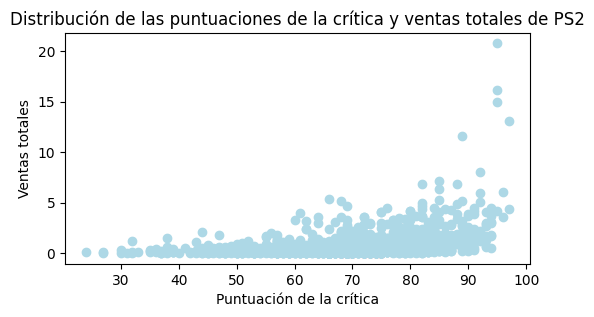

In [208]:
# 11. Gráfico de dispersion critic score

#PS2

plt.figure(figsize=(6,3))

plt.scatter(ps2_juegos['critic_score'], ps2_juegos['total_sales'], color='lightblue')

plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de la crítica y ventas totales de PS2')

plt.show()

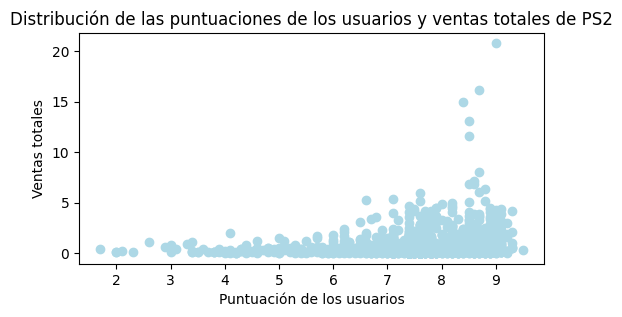

In [209]:
# 12. Gráfico de dispersion user score

#PS2

plt.figure(figsize=(6,3))

plt.scatter(ps2_juegos['user_score'], ps2_juegos['total_sales'], color='lightblue')

plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de los usuarios y ventas totales de PS2')

plt.show()

In [210]:
# 13. Correlación de ventas totales con scores de critica y usuarios

# PS2

print('Correlación ventas totales y critic score:', ps2_juegos['critic_score'].corr(ps2_juegos['total_sales']))
print()
print('Correlación ventas totales y user score:', ps2_juegos['user_score'].corr(ps2_juegos['total_sales']))

Correlación ventas totales y critic score: 0.3500205578243624

Correlación ventas totales y user score: 0.17636364459694534


In [211]:
# 14. Análisis de las rating ESBR y ventas totales

# PS2

ps2_esbr_vtas = round(ps2_juegos.groupby('rating')['total_sales'].sum(),2).sort_values(ascending=False)


print('Ventas por clasificación de juegos ESBR:\n\n')
print(ps2_esbr_vtas)


Ventas por clasificación de juegos ESBR:


rating
E          392.52
T          384.22
M          206.78
unknown    189.31
E10+        60.49
EC           0.24
Name: total_sales, dtype: float64


**Comentarios:  PS2**

* Ventas totales (mio usd) alcanzadas: \$ 1233.56
* Ventas máximas (mio usd) alcanzadas en un año: \$ 211.81
* Ventas mínimas (mio usd) alcanzadas en un año: \$ 0.45
* Ventas promedio (mio usd) anuales alcanzadas: \$ 102.8
* Número de años con ventas registradas: 12

En la gráfica “Ventas por año PS2” observamos que su crecimiento al segundo año de lanzamiento fue considerable seguido de 5 años (2001 a 2005) con los picos mas altos de ventas, siendo 2004 el mejor año de su vida activa.

En la distribución de las ventas observada en el gráfico de caja, observamos que las distribuciones están en un rango muy corto, muy cerca de la media, y una cantidad importante de valores atípicos fuera de los límites (IQR*1.5).

En la gráfica “Ventas totales de PS2 por región” observamos que la región de Norteamérica es la zona con mayor aportación a sus ventas, seguida de Europa.

En “Ventas por género de juego” observamos que los dos géneros que aportaron la mayor parte de los ingresos son “Action” y “Sports”, esto se puede comprobar en la gráfica “Ventas por año-género” donde estos dos géneros se mantienen en la punta año con año.

Analizando la cantidad de juegos por año encontramos que 2002 fue el año con más juegos registrados y adicional coincide que de los años 2002 a 2006 son los años con mayor número de juegos lanzados y a su vez los años con más ventas, de igual forma, en la gráfica “Juegos por género lanzados” denotamos que los géneros con mayor cantidad de lanzamientos son “Sports” y “Action”.

En cuanto a las evaluaciones de la critica y los usuarios de los juegos encontramos:

* Critic score promedio: 69.37
* Critic score máximo: 97.0
* Critic score mínimo: 24.0
* User score promedio: 7.55
* User score máximo: 9.5
* User score mínimo: 1.7

Haciendo un análisis mas profundo del promedio de las calificaciones de la critica encontramos que los juegos de “Sports” tienen la calificación mas alta promedio de 73.49, sin embargo, los juegos de “Action” se encuentran en el ante penúltimo lugar con 67.23.

De parte de las evaluaciones de los usuarios encontramos los juegos de “Action” con 7.58 en media tabla, y “Sports” con 7.55.

Las distribuciones de las puntuaciones de la crítica y los usuarios mostrados en las gráficas de dispersión encontramos que existe coincidencia entre las ventas mas altas con las calificaciones de ambos.

Realizamos un análisis de correlación entre las calificaciones de la crítica y de los usuarios y las ventas totales:

* Correlación ventas totales y critic score: 0.3500205578243624

* Correlación ventas totales y user score: 0.17636364459694548

Donde vemos una correlación no tan fuerte entre estas, es decir, las evaluaciones de la crítica y del usuario no están fuertemente relacionadas con las ventas de esta plataforma.

Finalmente, con el análisis comprobamos que las ventas por la clasificación de la ESBR nos indica que los juegos clasificados como “E” (“Everyone”) son los juegos con mayor venta, seguidos por los juegos “T” (“Teen”).


**4.3.2 Análisis X360**

In [212]:
# 1. Años activos, maximo y minimo de ventas por top plataformas

# X360

x360_vta = ventas_año_top_plataformas[ventas_año_top_plataformas['platform']== 'X360']

x360_tot_vta = x360_vta['total_sales'].sum()

x360_max_vta = x360_vta['total_sales'].max()

x360_min_vta = x360_vta['total_sales'].min()

x360_mean_vta = x360_vta['total_sales'].mean()

x360_años_con_vta = x360_vta['year_of_release'].count()

print('Ventas totales (mio usd) alcanzadas por X360: $', round(x360_tot_vta,2))
print()
print('Ventas máximas (mio usd) alcanzadas en un año por X360: $', round(x360_max_vta,2))
print()
print('Ventas mínimas (mio usd) alcanzadas en un año por X360: $', round(x360_min_vta,2))
print()
print('Ventas promedio (mio usd) anuales alcanzadas por X360: $', round(x360_mean_vta,2))
print()
print('Número de años con ventas registradas por X360:', x360_años_con_vta)
print()


Ventas totales (mio usd) alcanzadas por X360: $ 961.24

Ventas máximas (mio usd) alcanzadas en un año por X360: $ 170.03

Ventas mínimas (mio usd) alcanzadas en un año por X360: $ 1.52

Ventas promedio (mio usd) anuales alcanzadas por X360: $ 80.1

Número de años con ventas registradas por X360: 12



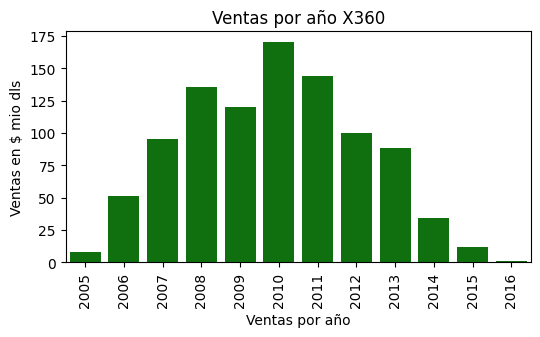


Ventas por año X360:

   platform  year_of_release  total_sales
45     X360             2005         8.25
46     X360             2006        51.62
47     X360             2007        95.41
48     X360             2008       135.26
49     X360             2009       120.29
50     X360             2010       170.03
51     X360             2011       143.84
52     X360             2012        99.74
53     X360             2013        88.58
54     X360             2014        34.74
55     X360             2015        11.96
56     X360             2016         1.52


In [213]:
# 2. Gráfica de barras ventas por año

# X360

plt.figure(figsize=(6,3))
sns.barplot(x=x360_vta['year_of_release'], y=x360_vta['total_sales'], color='green')
plt.xlabel('Ventas por año', fontsize=10)
plt.ylabel('Ventas en $ mio dls')
plt.title('Ventas por año X360')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()
print('Ventas por año X360:')
print()
print(x360_vta)

Estadisticas rápidas ventas totales X360:

 count    1232.000000
mean        0.780227
std         1.632122
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64

Diagrama de caja ventas totales X360:



Text(0.5, 1.0, 'X360: gráfico de caja ventas totales')

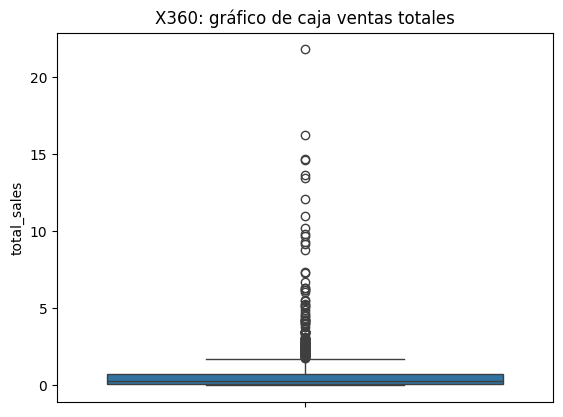

In [214]:
# 3. Traza un diagrama de caja para visualizar la distribución de las ventas

# X360

x360_juegos = filtro_top_plataformas[filtro_top_plataformas['platform'] == 'X360']

print('Estadisticas rápidas ventas totales X360:\n\n', x360_juegos['total_sales'].describe())
print()

print('Diagrama de caja ventas totales X360:')
print()

sns.boxplot(x360_juegos['total_sales'])

plt.title('X360: gráfico de caja ventas totales')

Ventas totales X360 zona NA: 595.74

Ventas totales X360 zona EU: 268.32

Ventas totales X360 zona JP: 12.3

Ventas totales X360 zona Other: 84.88



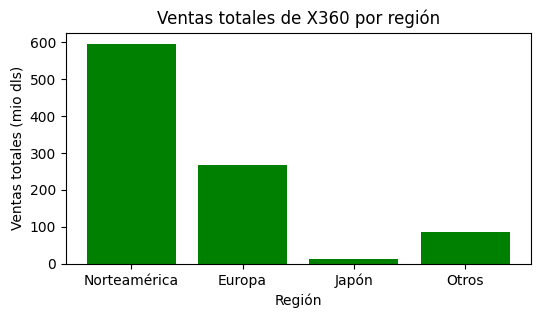

In [215]:
# 4. Ventas totales por país

# X360

x360_vtas_na = round(x360_juegos['na_sales'].sum(),2)

x360_vtas_eu = round(x360_juegos['eu_sales'].sum(),2)

x360_vtas_jp = round(x360_juegos['jp_sales'].sum(),2)

x360_vtas_other = round(x360_juegos['other_sales'].sum(),2)

print('Ventas totales X360 zona NA:', x360_vtas_na)
print()
print('Ventas totales X360 zona EU:', x360_vtas_eu)
print()
print('Ventas totales X360 zona JP:', x360_vtas_jp)
print()
print('Ventas totales X360 zona Other:', x360_vtas_other)
print()

x360_vtas_region = [x360_vtas_na, x360_vtas_eu, x360_vtas_jp, x360_vtas_other]

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, x360_vtas_region, color='green')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales de X360 por región')

plt.show()

Ventas totales ($ mio dls) registradas por género de juego en X360:

genre
Shooter         275.62
Action          236.71
Sports          136.69
Misc             88.95
Role-Playing     71.39
Racing           64.13
Fighting         37.32
Adventure        14.89
Simulation       13.86
Platform         11.29
Strategy          9.66
Puzzle            0.73
Name: total_sales, dtype: float64



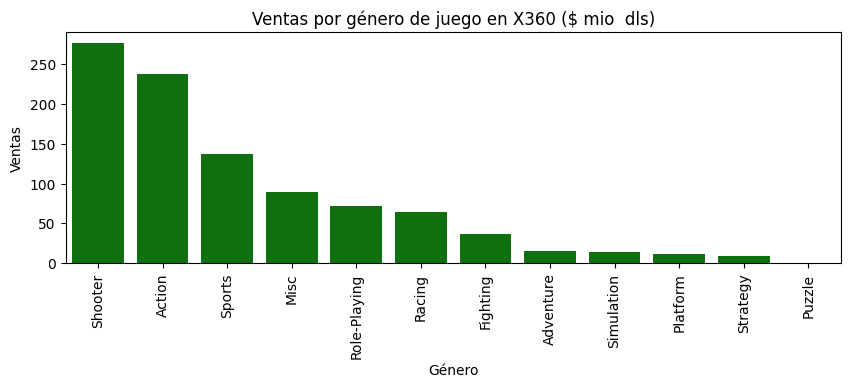

In [216]:
# 5. Ventas por genero de juegos por año

# X360

x360_vtas_genero = x360_juegos.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

print('Ventas totales ($ mio dls) registradas por género de juego en X360:')
print()
print(x360_vtas_genero)
print()

plt.figure(figsize=(10,3))
sns.barplot(x=x360_vtas_genero.index, y=x360_vtas_genero.values, color='green')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por género de juego en X360 ($ mio  dls)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Ventas registradas por género por año en X360:

     year_of_release      genre  total_sales
0               2005     Action         1.25
1               2005   Fighting         0.46
2               2005     Racing         2.05
3               2005    Shooter         3.17
4               2005     Sports         1.32
..               ...        ...          ...
112             2016  Adventure         0.03
113             2016       Misc         0.04
114             2016   Platform         0.10
115             2016    Shooter         0.04
116             2016     Sports         0.83

[117 rows x 3 columns]



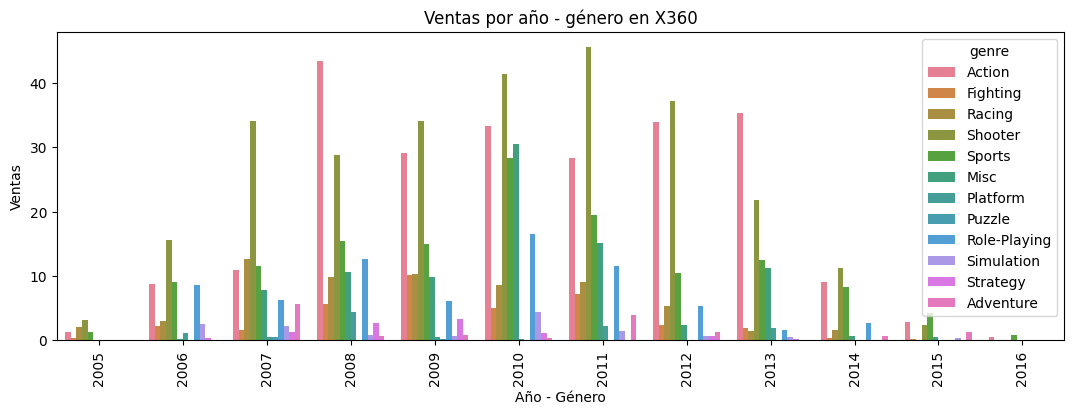

In [217]:
# 7. Ventas por genero de juegos por año

# X360

x360_vtas_genero_año = x360_juegos.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()

print('Ventas registradas por género por año en X360:')
print()
print(x360_vtas_genero_año)
print()

plt.figure(figsize=(13,4))
sns.barplot(x='year_of_release', y='total_sales', hue='genre', data= x360_vtas_genero_año)
plt.xlabel('Año - Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por año - género en X360')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Juegos registrados con venta por año en X360:

year_of_release
2005     18
2006     93
2007    123
2008    146
2009    172
2010    182
2011    206
2012    106
2013     75
2014     63
2015     35
2016     13
Name: name, dtype: int64



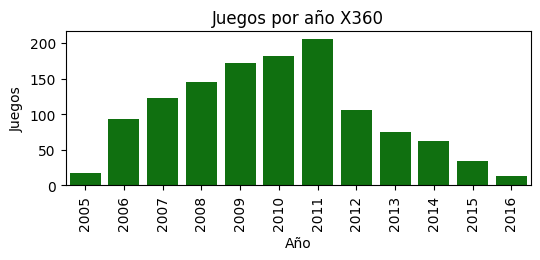

In [218]:
# 7. Cantidad de juegos con ventas por plataforma

# X360

x360_juegos_año = x360_juegos.groupby('year_of_release')['name'].count()

print('Juegos registrados con venta por año en X360:')
print()
print(x360_juegos_año)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=x360_juegos_año.index, y=x360_juegos_año.values, color='green')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Juegos')
plt.title('Juegos por año X360')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Juegos por género lanzados en X360:

genre
Action          317
Sports          212
Shooter         197
Misc            123
Racing          101
Role-Playing     75
Fighting         65
Adventure        48
Simulation       36
Strategy         27
Platform         25
Puzzle            6
Name: name, dtype: int64



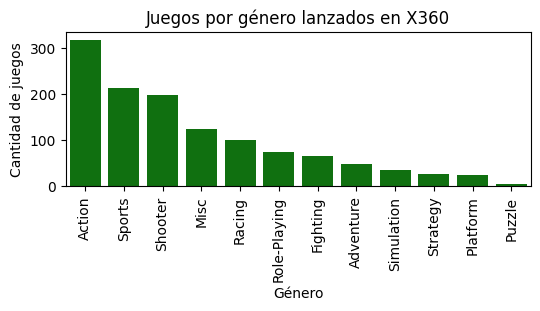

In [219]:
# 8. Cantidad de juegos lanzados por genero

# X360

x360_juegos_genero = x360_juegos.groupby('genre')['name'].count().sort_values(ascending=False)

print('Juegos por género lanzados en X360:')
print()
print(x360_juegos_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=x360_juegos_genero.index, y=x360_juegos_genero.values, color='green')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por género lanzados en X360')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [220]:
# 9. Análisis de las evaluaciones de los juegos

# X360

x360_critic_mean = x360_juegos['critic_score'].mean()

x360_critic_max = x360_juegos['critic_score'].max()

x360_critic_min = x360_juegos['critic_score'].min()

x360_user_mean = x360_juegos['user_score'].mean()

x360_user_max = x360_juegos['user_score'].max()

x360_user_min = x360_juegos['user_score'].min()

print('Critic score promedio:', x360_critic_mean)
print()
print('Critic score máximo:', x360_critic_max)
print()
print('Critic score mínimo:', x360_critic_min)
print()
print('User score promedio:', x360_user_mean)
print()
print('User score máximo:', x360_user_max)
print()
print('User score mínimo:', x360_user_min)
print()


Critic score promedio: 69.18100649350649

Critic score máximo: 98.0

Critic score mínimo: 19.0

User score promedio: 6.849431818181818

User score máximo: 9.0

User score mínimo: 0.7



In [221]:
# 10. Análisis de las evaluaciones de los juegos por género

# X360

x360_critic_genre = round(x360_juegos.groupby('genre')['critic_score'].mean(),2).sort_values(ascending=False)

x360_user_genre = round(x360_juegos.groupby('genre')['user_score'].mean(),2).sort_values(ascending=False)

print('Critic score promedio por género X360:\n\n')
print()
print(x360_critic_genre)
print()
print('User score promedio por género X360:\n\n')
print()
print(x360_user_genre)


Critic score promedio por género X360:



genre
Role-Playing    72.29
Strategy        72.22
Sports          71.22
Shooter         70.45
Racing          70.34
Fighting        70.22
Misc            68.21
Action          67.32
Simulation      66.11
Platform        65.92
Adventure       64.31
Puzzle          61.50
Name: critic_score, dtype: float64

User score promedio por género X360:



genre
Role-Playing    7.19
Strategy        7.14
Simulation      7.08
Adventure       7.06
Action          6.94
Fighting        6.90
Racing          6.88
Shooter         6.86
Misc            6.75
Platform        6.62
Sports          6.54
Puzzle          5.50
Name: user_score, dtype: float64


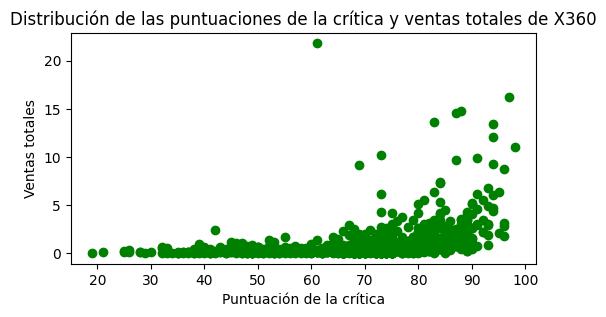

In [222]:
# 11. Gráfico de dispersion critic score

#X360

plt.figure(figsize=(6,3))

plt.scatter(x360_juegos['critic_score'], x360_juegos['total_sales'], color='green')

plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de la crítica y ventas totales de X360')

plt.show()

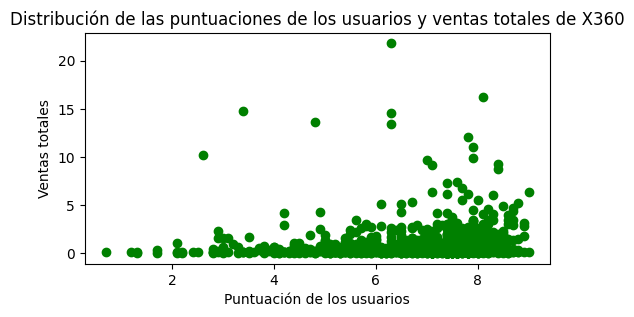

In [223]:
# 12. Gráfico de dispersion user score

#X360

plt.figure(figsize=(6,3))

plt.scatter(x360_juegos['user_score'], x360_juegos['total_sales'], color='green')

plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de los usuarios y ventas totales de X360')

plt.show()

In [224]:
# 13. Correlación de ventas totales con scores de critica y usuarios

# X360

print('Correlación ventas totales y critic score X360:', x360_juegos['critic_score'].corr(x360_juegos['total_sales']))
print()
print('Correlación ventas totales y user score X360:', x360_juegos['user_score'].corr(x360_juegos['total_sales']))

Correlación ventas totales y critic score X360: 0.3633348577272337

Correlación ventas totales y user score X360: 0.06376378537177112


In [225]:
# 14. Análisis de las rating ESBR y ventas totales

# X360

x360_esbr_vtas = round(x360_juegos.groupby('rating')['total_sales'].sum(),2).sort_values(ascending=False)


print('Ventas X360 por clasificación de juegos ESBR:\n\n')
print(x360_esbr_vtas)


Ventas X360 por clasificación de juegos ESBR:


rating
M          436.77
T          188.05
E          180.14
E10+        95.43
unknown     60.85
Name: total_sales, dtype: float64


**Comentarios:  X360**

* Ventas totales (mio usd) alcanzadas: \$ 961.24

* Ventas máximas (mio usd) alcanzadas en un año: \$ 170.03

* Ventas mínimas (mio usd) alcanzadas en un año: \$ 1.52

* Ventas promedio (mio usd) anuales alcanzadas: \$ 80

* Número de años con ventas registradas: 12

En la gráfica “Ventas por año X360” observamos un crecimiento constante a partir del lanzamiento, alcanzando su mejor año de ventas en el 2010 (5 años después del lanzamiento), sin embargo, a partir de este año de igual forma inicia su curva de descenso constante año con año hasta el 2016, último año con ventas registradas.

En la distribución de las ventas observada en el gráfico de caja, observamos que las distribuciones están en un rango muy corto, muy cerca de la media, y una cantidad importante de valores atípicos fuera de los límites (IQR*1.5).

En la gráfica “Ventas totales de X360 por región” observamos que la región de Norteamérica es la zona con mayor aportación a sus ventas, seguida de Europa y “otros”, siendo Japón la zona que menos aportó a sus ventas.

En “Ventas por género de juego” observamos que los 3 géneros que aportaron la mayor parte de los ingresos son “Shooter”, “Action” y “Sports”, estos 3 géneros aportaron consistentemente los mayores ingresos año con año (gráfica “Ventas por año – género X360”). “Strategy” y “Puzzle” son los géneros que menos aportaron a los ingresos.

Analizando la cantidad de juegos por año encontramos que 2011 es el año con el mayor número de juegos lanzados, sin embargo, como lo vimos anteriormente este no fue su mejor año de ventas, de hecho a partir de este año inicia la baja de ventas anual, cabe mencionar que a partir de 2012 de igual forma la cantidad de juegos lanzados inicio a bajar considerablemente hasta los niveles que se tenían en 2006.

Los géneros de juego que cuentan con mas lanzamientos son “Action”, “Sports” y “Shooter” coincidiendo con los géneros con mayores ventas. Y “Puzzle” es el género con menos juegos lanzados.

En cuanto a las evaluaciones de la crítica y los usuarios de los juegos encontramos:

* Critic score promedio: 69.18
* Critic score máximo: 98
* Critic score mínimo: 19
* User score promedio: 6.85
* User score máximo: 9
* User score mínimo: 0.7

Haciendo un análisis más profundo del promedio de las calificaciones de la crítica por género encontramos:

* Mejor evaluados top 3: “Role-Playing”, “Strategy”, “Sports”
* Evaluación del género con mayores ventas: “Shooter”, evaluación muy cercana a la media de las calificaciones de todos los juegos, es decir, no destaca en las evaluaciones.
* Peor evaluado: “Puzzle”, coincide con el género de menor venta

De parte de las evaluaciones de los usuarios encontramos:

* Mejor evaluados top 3: “Role-Playing”, “Strategy”, “Simulation”
* Evaluación del género con mayores ventas: “Shooter”, evaluación muy cercana a la media de las calificaciones de todos los juegos, es decir, no destaca en las evaluaciones.
* Peor evaluado: “Puzzle”, coincide con el género de menor venta

La distribución de las puntuaciones de la crítica mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

La distribución de las puntuaciones de los usuarios mostrados en las gráficas de dispersión encontramos que existen juegos que están por debajo de la media de evaluación con ventas altas.

Realizamos un análisis de correlación entre las calificaciones de la crítica y de los usuarios y las ventas totales:

* Correlación ventas totales y critic score X360: 0.3633348577272335

En cuanto a las ventas y la evaluación de la crítitca, existe correlación positiva, con relativa baja relación de mejor evaluación equivale a mayores ventas.

* Correlación ventas totales y user score X360: 0.06376378537177109

En cuanto a las ventas y la evaluación de usuarios, existe correlación positiva, pero con muy baja relación entre las variables, es decir, una mejor evaluación del usuario no equivale a mejores ventas.

Finalmente, con el análisis de ventas por tipo de clasificación de ESBR comprobamos que los juegos clasificados como “M” (“Mature”) presentan una considerable mayor venta que los juegos de otras clasificaciones.


**4.3.3 Análisis PS3**

In [226]:
# 1. Años activos, maximo y minimo de ventas por top plataformas

# PS3

ps3_vta = ventas_año_top_plataformas[ventas_año_top_plataformas['platform']== 'PS3']

ps3_tot_vta = ps3_vta['total_sales'].sum()

ps3_max_vta = ps3_vta['total_sales'].max()

ps3_min_vta = ps3_vta['total_sales'].min()

ps3_mean_vta = ps3_vta['total_sales'].mean()

ps3_años_con_vta = ps3_vta['year_of_release'].count()

print('Ventas totales (mio usd) alcanzadas por PS3: $', round(ps3_tot_vta,2))
print()
print('Ventas máximas (mio usd) alcanzadas en un año por PS3: $', round(ps3_max_vta,2))
print()
print('Ventas mínimas (mio usd) alcanzadas en un año por PS3: $', round(ps3_min_vta,2))
print()
print('Ventas promedio (mio usd) anuales alcanzadas por PS3: $', round(ps3_mean_vta,2))
print()
print('Número de años con ventas registradas por PS3:', ps3_años_con_vta)
print()


Ventas totales (mio usd) alcanzadas por PS3: $ 931.34

Ventas máximas (mio usd) alcanzadas en un año por PS3: $ 156.78

Ventas mínimas (mio usd) alcanzadas en un año por PS3: $ 3.6

Ventas promedio (mio usd) anuales alcanzadas por PS3: $ 84.67

Número de años con ventas registradas por PS3: 11



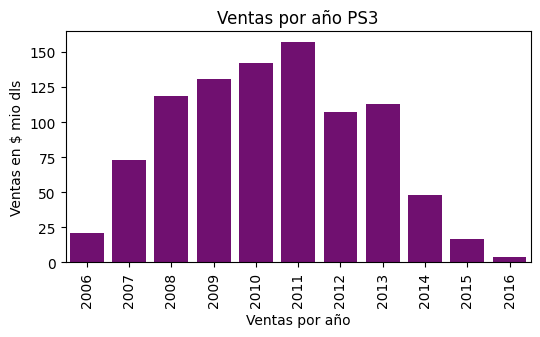


Ventas por año PS3:

   platform  year_of_release  total_sales
23      PS3             2006        20.96
24      PS3             2007        73.19
25      PS3             2008       118.52
26      PS3             2009       130.93
27      PS3             2010       142.17
28      PS3             2011       156.78
29      PS3             2012       107.36
30      PS3             2013       113.25
31      PS3             2014        47.76
32      PS3             2015        16.82
33      PS3             2016         3.60


In [227]:
# 2. Gráfica de barras ventas por año

# PS3

plt.figure(figsize=(6,3))
sns.barplot(x=ps3_vta['year_of_release'], y=ps3_vta['total_sales'], color='purple')
plt.xlabel('Ventas por año', fontsize=10)
plt.ylabel('Ventas en $ mio dls')
plt.title('Ventas por año PS3')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()
print('Ventas por año PS3:')
print()
print(ps3_vta)

Estadisticas rápidas ventas totales PS3:

 count    1306.000000
mean        0.713124
std         1.403065
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

Diagrama de caja ventas totales ps3:



Text(0.5, 1.0, 'PS3: gráfico de caja ventas totales')

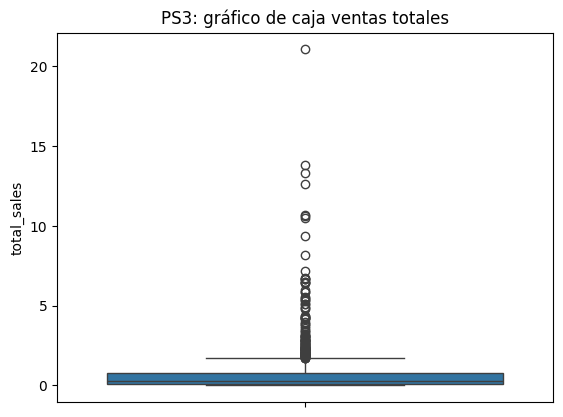

In [228]:
# 3. Traza un diagrama de caja para visualizar la distribución de las ventas

# PS3

ps3_juegos = filtro_top_plataformas[filtro_top_plataformas['platform'] == 'PS3']

print('Estadisticas rápidas ventas totales PS3:\n\n', ps3_juegos['total_sales'].describe())
print()

print('Diagrama de caja ventas totales ps3:')
print()

sns.boxplot(ps3_juegos['total_sales'])

plt.title('PS3: gráfico de caja ventas totales')

Ventas totales PS3 zona NA: 390.13

Ventas totales PS3 zona EU: 327.21

Ventas totales PS3 zona JP: 79.41

Ventas totales PS3 zona Other: 134.59



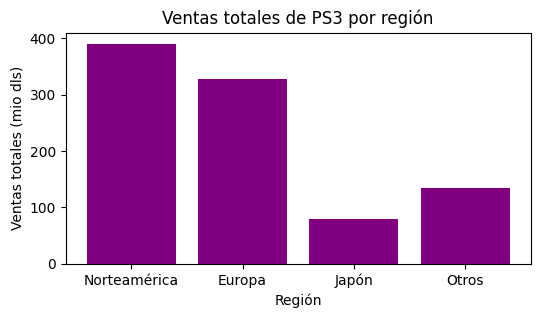

In [229]:
# 4. Ventas totales por país

# PS3

ps3_vtas_na = round(ps3_juegos['na_sales'].sum(),2)

ps3_vtas_eu = round(ps3_juegos['eu_sales'].sum(),2)

ps3_vtas_jp = round(ps3_juegos['jp_sales'].sum(),2)

ps3_vtas_other = round(ps3_juegos['other_sales'].sum(),2)

print('Ventas totales PS3 zona NA:', ps3_vtas_na)
print()
print('Ventas totales PS3 zona EU:', ps3_vtas_eu)
print()
print('Ventas totales PS3 zona JP:', ps3_vtas_jp)
print()
print('Ventas totales PS3 zona Other:', ps3_vtas_other)
print()

ps3_vtas_region = [ps3_vtas_na, ps3_vtas_eu, ps3_vtas_jp, ps3_vtas_other]

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, ps3_vtas_region, color='purple')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales de PS3 por región')

plt.show()

Ventas totales ($ mio dls) registradas por género de juego en PS3:

genre
Action          297.87
Shooter         192.29
Sports          133.15
Role-Playing     73.65
Racing           71.31
Fighting         51.11
Misc             44.93
Platform         29.32
Adventure        22.28
Simulation       10.31
Strategy          4.68
Puzzle            0.44
Name: total_sales, dtype: float64



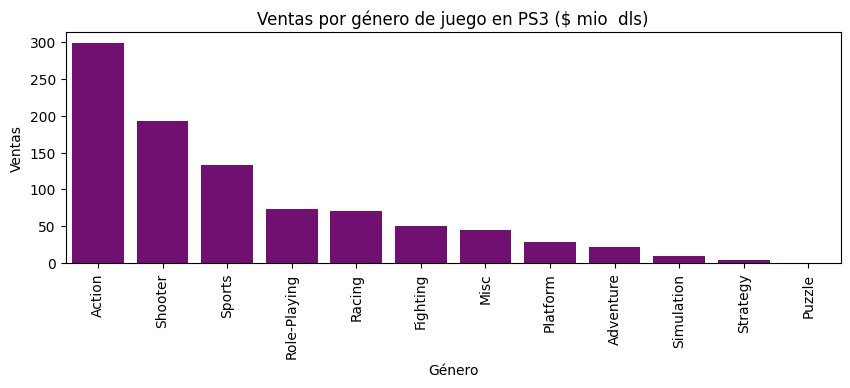

In [230]:
# 5. Ventas por genero de juegos por año

# PS3

ps3_vtas_genero = ps3_juegos.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

print('Ventas totales ($ mio dls) registradas por género de juego en PS3:')
print()
print(ps3_vtas_genero)
print()

plt.figure(figsize=(10,3))
sns.barplot(x=ps3_vtas_genero.index, y=ps3_vtas_genero.values, color='purple')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por género de juego en PS3 ($ mio  dls)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Ventas registradas por género por año en PS3:

     year_of_release         genre  total_sales
0               2006        Action         0.92
1               2006      Fighting         1.66
2               2006          Misc         0.04
3               2006      Platform         1.17
4               2006        Racing         7.23
..               ...           ...          ...
110             2016          Misc         0.22
111             2016      Platform         0.11
112             2016  Role-Playing         0.46
113             2016       Shooter         0.02
114             2016        Sports         1.45

[115 rows x 3 columns]



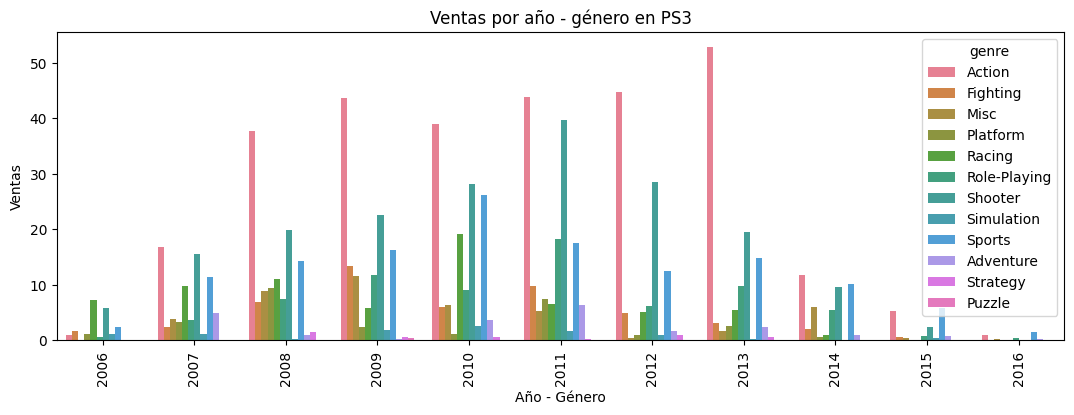

In [231]:
# 7. Ventas por genero de juegos por año

# PS3

ps3_vtas_genero_año = ps3_juegos.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()

print('Ventas registradas por género por año en PS3:')
print()
print(ps3_vtas_genero_año)
print()

plt.figure(figsize=(13,4))
sns.barplot(x='year_of_release', y='total_sales', hue='genre', data= ps3_vtas_genero_año)
plt.xlabel('Año - Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por año - género en PS3')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Juegos registrados con venta por año en PS3:

year_of_release
2006     27
2007     90
2008    138
2009    162
2010    181
2011    215
2012    148
2013    126
2014    108
2015     73
2016     38
Name: name, dtype: int64



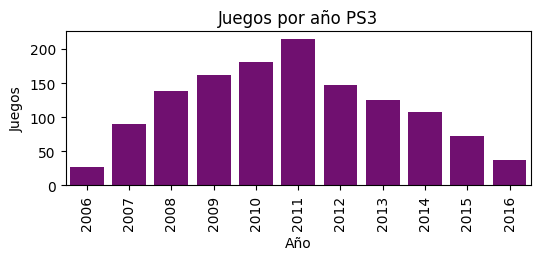

In [232]:
# 7. Cantidad de juegos con ventas por plataforma

# PS3

ps3_juegos_año = ps3_juegos.groupby('year_of_release')['name'].count()

print('Juegos registrados con venta por año en PS3:')
print()
print(ps3_juegos_año)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=ps3_juegos_año.index, y=ps3_juegos_año.values, color='purple')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Juegos')
plt.title('Juegos por año PS3')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Juegos por género lanzados en PS3:

genre
Action          373
Sports          211
Shooter         155
Misc            122
Role-Playing    117
Racing           90
Fighting         76
Adventure        72
Platform         36
Simulation       30
Strategy         22
Puzzle            2
Name: name, dtype: int64



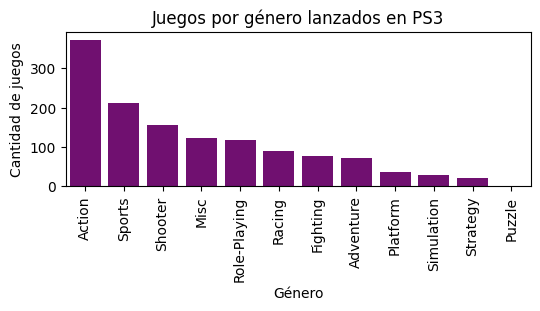

In [233]:
# 8. Cantidad de juegos lanzados por genero

# PS3

ps3_juegos_genero = ps3_juegos.groupby('genre')['name'].count().sort_values(ascending=False)

print('Juegos por género lanzados en PS3:')
print()
print(ps3_juegos_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=ps3_juegos_genero.index, y=ps3_juegos_genero.values, color='purple')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por género lanzados en PS3')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [234]:
# 9. Análisis de las evaluaciones de los juegos

# PS3

ps3_critic_mean = ps3_juegos['critic_score'].mean()

ps3_critic_max = ps3_juegos['critic_score'].max()

ps3_critic_min = ps3_juegos['critic_score'].min()

ps3_user_mean = ps3_juegos['user_score'].mean()

ps3_user_max = ps3_juegos['user_score'].max()

ps3_user_min = ps3_juegos['user_score'].min()

print('Critic score promedio:', ps3_critic_mean)
print()
print('Critic score máximo:', ps3_critic_max)
print()
print('Critic score mínimo:', ps3_critic_min)
print()
print('User score promedio:', ps3_user_mean)
print()
print('User score máximo:', ps3_user_max)
print()
print('User score mínimo:', ps3_user_min)
print()


Critic score promedio: 70.40888208269526

Critic score máximo: 98.0

Critic score mínimo: 13.0

User score promedio: 6.961332312404288

User score máximo: 9.1

User score mínimo: 0.2



In [235]:
# 10. Análisis de las evaluaciones de los juegos por género

# PS3

ps3_critic_genre = round(ps3_juegos.groupby('genre')['critic_score'].mean(),2).sort_values(ascending=False)

ps3_user_genre = round(ps3_juegos.groupby('genre')['user_score'].mean(),2).sort_values(ascending=False)

print('Critic score promedio por género PS3:\n\n')
print()
print(ps3_critic_genre)
print()
print('User score promedio por género PS3:\n\n')
print()
print(ps3_user_genre)


Critic score promedio por género PS3:



genre
Sports          74.03
Strategy        73.14
Fighting        72.97
Puzzle          72.00
Role-Playing    71.70
Racing          71.13
Misc            70.25
Shooter         69.79
Platform        69.44
Action          68.64
Adventure       66.64
Simulation      65.20
Name: critic_score, dtype: float64

User score promedio por género PS3:



genre
Puzzle          7.80
Strategy        7.40
Role-Playing    7.39
Fighting        7.32
Adventure       7.31
Action          7.06
Platform        7.06
Simulation      6.95
Misc            6.89
Racing          6.76
Shooter         6.68
Sports          6.58
Name: user_score, dtype: float64


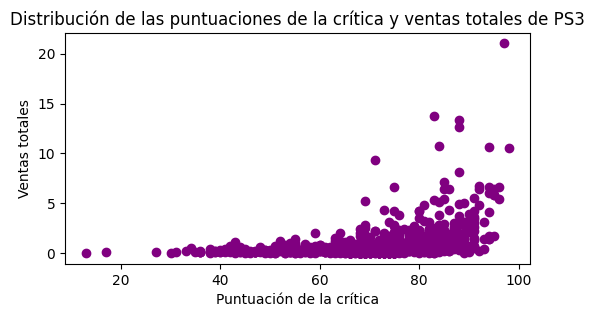

In [236]:
# 11. Gráfico de dispersion critic score

#PS3

plt.figure(figsize=(6,3))

plt.scatter(ps3_juegos['critic_score'], ps3_juegos['total_sales'], color='purple')

plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de la crítica y ventas totales de PS3')

plt.show()

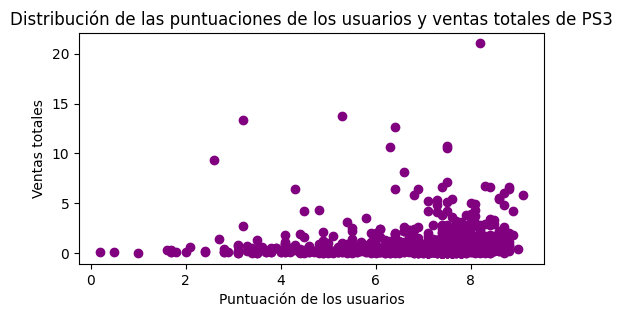

In [237]:
# 12. Gráfico de dispersion user score

#PS3

plt.figure(figsize=(6,3))

plt.scatter(ps3_juegos['user_score'], ps3_juegos['total_sales'], color='purple')

plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de los usuarios y ventas totales de PS3')

plt.show()

In [238]:
# 13. Correlación de ventas totales con scores de critica y usuarios

# PS3

print('Correlación ventas totales y critic score PS3:', ps3_juegos['critic_score'].corr(ps3_juegos['total_sales']))
print()
print('Correlación ventas totales y user score PS3:', ps3_juegos['user_score'].corr(ps3_juegos['total_sales']))

Correlación ventas totales y critic score PS3: 0.4050741486988239

Correlación ventas totales y user score PS3: 0.04861676422310742


In [239]:
# 14. Análisis de las rating ESBR y ventas totales

# PS3

ps3_esbr_vtas = round(ps3_juegos.groupby('rating')['total_sales'].sum(),2).sort_values(ascending=False)


print('Ventas PS3 por clasificación de juegos ESBR:\n\n')
print(ps3_esbr_vtas)


Ventas PS3 por clasificación de juegos ESBR:


rating
M          374.94
T          221.28
E          171.48
unknown     93.95
E10+        69.69
Name: total_sales, dtype: float64


**Comentarios:  PS3**

* Ventas totales (mio usd) alcanzadas: \$ 931.34
* Ventas máximas (mio usd) alcanzadas en un año: \$ 156.78
* Ventas mínimas (mio usd) alcanzadas en un año: \$ 3.6
* Ventas promedio (mio usd) anuales alcanzadas: \$ 84.67
* Número de años con ventas registradas: 11

En la gráfica “Ventas por año PS3” observamos un crecimiento constante a partir del lanzamiento, alcanzando su mejor año de ventas en el 2011 (6 años continuos de crecimiento), a partir de 2012 las ventas reducen considerablemente, aunque tiene un poco de recuperación en 2013, sin embargo, a partir de 2014 a 2016 sus ventas bajan a los niveles mínimos.

En la distribución de las ventas observada en el gráfico de caja, observamos que las distribuciones están en un rango muy corto, muy cerca de la media, y una cantidad importante de valores atípicos fuera de los límites (IQR*1.5).

En la gráfica “Ventas totales de PS3 por región” observamos que la región de Norteamérica es la zona con mayor aportación a sus ventas, seguida de Europa con niveles muy cercanos a las ventas de Norteamérica, Japón aún siendo la zona con menor aportación, si presenta un nivel superior de ventas que el de otras consolas.

En “Ventas por género de juego” observamos que los 3 géneros que aportaron la mayor parte de los ingresos son “Action”, “Shooter” y “Sports”, estos 3 géneros aportaron consistentemente los mayores ingresos año con año (gráfica “Ventas por año – género X360”). “Strategy” y “Puzzle” son los géneros que menos aportaron a los ingresos.

Analizando la cantidad de juegos por año encontramos que 2011 es el año con el mayor número de juegos lanzados, al igual que su mejor año de ventas de la plataforma, a partir de 2012 la cantidad de juegos vendidos inicio su descenso continuo hasta el 2016.

Los géneros de juego que cuentan con más lanzamientos son “Action”, “Sports” y “Shooter” coincidiendo con los géneros con mayores ventas. Y “Puzzle” es el género con menos juegos lanzados.

En cuanto a las evaluaciones de la crítica y los usuarios de los juegos encontramos:

* Critic score promedio: 70.41
* Critic score máximo: 98
* Critic score mínimo: 13
* User score promedio: 6.96
* User score máximo: 9.1
* User score mínimo: 0.2

Haciendo un análisis más profundo del promedio de las calificaciones de la crítica por género encontramos:

* Mejor evaluados top 3: “Sports”, “Strategy”, “Fighting”
* Evaluación del género con mayores ventas: “Action”, evaluación por debajo de la media de las evaluaciones.
* Peor evaluado: “Simulation”

De parte de las evaluaciones de los usuarios encontramos:

* Mejor evaluados top 3: “Puzzle”, “Strategy”, “Role-Playing” 
* Evaluación del género con mayores ventas: “Action”, evaluación muy cercana a la media de las calificaciones de todos los juegos, es decir, no destaca en las evaluaciones.
* Peor evaluado: “Sports”, siendo uno de los géneros con mayores ventas es de llamar la atención que los usuarios no les otorgaran una mejor evaluación.

La distribución de las puntuaciones de la crítica mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

La distribución de las puntuaciones de los usuarios mostrados en las gráficas de dispersión encontramos que existen juegos que están por debajo de la media de evaluación con ventas altas.

Realizamos un análisis de correlación entre las calificaciones de la crítica y de los usuarios y las ventas totales:

* Correlación ventas totales y critic score PS3: 0.40507414869882374

En cuanto a las ventas y la evaluación de la crítica, existe correlación positiva, con relación media de las variables, una mejor evaluación es probable que tenga mayores ventas.

* Correlación ventas totales y user score PS3: 0.04861676422310743

En cuanto a las ventas y la evaluación de usuarios, existe correlación positiva, pero con muy baja relación entre las variables, es decir, una mejor evaluación del usuario no equivale a mejores ventas.

Finalmente, con el análisis de ventas por tipo de clasificación de ESBR comprobamos que los juegos clasificados como “M” (“Mature”) presentan una considerable mayor venta que los juegos de otras clasificaciones.


**4.3.4 Análisis Wii**

In [240]:
# 1. Años activos, maximo y minimo de ventas por top plataformas

# Wii

Wii_vta = ventas_año_top_plataformas[ventas_año_top_plataformas['platform']== 'Wii']

Wii_tot_vta = Wii_vta['total_sales'].sum()

Wii_max_vta = Wii_vta['total_sales'].max()

Wii_min_vta = Wii_vta['total_sales'].min()

Wii_mean_vta = Wii_vta['total_sales'].mean()

Wii_años_con_vta = Wii_vta['year_of_release'].count()

print('Ventas totales (mio usd) alcanzadas por Wii: $', round(Wii_tot_vta,2))
print()
print('Ventas máximas (mio usd) alcanzadas en un año por Wii: $', round(Wii_max_vta,2))
print()
print('Ventas mínimas (mio usd) alcanzadas en un año por Wii: $', round(Wii_min_vta,2))
print()
print('Ventas promedio (mio usd) anuales alcanzadas por Wii: $', round(Wii_mean_vta,2))
print()
print('Número de años con ventas registradas por Wii:', Wii_años_con_vta)
print()


Ventas totales (mio usd) alcanzadas por Wii: $ 891.18

Ventas máximas (mio usd) alcanzadas en un año por Wii: $ 206.97

Ventas mínimas (mio usd) alcanzadas en un año por Wii: $ 0.18

Ventas promedio (mio usd) anuales alcanzadas por Wii: $ 81.02

Número de años con ventas registradas por Wii: 11



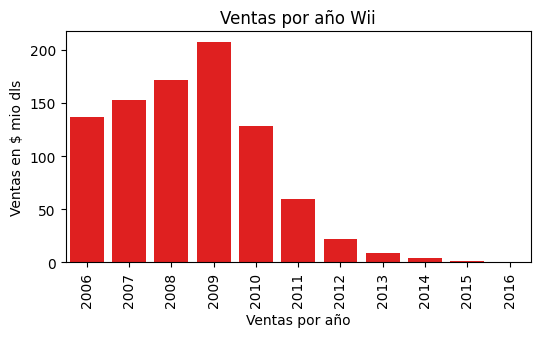


Ventas por año Wii:

   platform  year_of_release  total_sales
23      PS3             2006        20.96
24      PS3             2007        73.19
25      PS3             2008       118.52
26      PS3             2009       130.93
27      PS3             2010       142.17
28      PS3             2011       156.78
29      PS3             2012       107.36
30      PS3             2013       113.25
31      PS3             2014        47.76
32      PS3             2015        16.82
33      PS3             2016         3.60


In [241]:
# 2. Gráfica de barras ventas por año

# Wii

plt.figure(figsize=(6,3))
sns.barplot(x=Wii_vta['year_of_release'], y=Wii_vta['total_sales'], color='red')
plt.xlabel('Ventas por año', fontsize=10)
plt.ylabel('Ventas en $ mio dls')
plt.title('Ventas por año Wii')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()
print('Ventas por año Wii:')
print()
print(ps3_vta)

Estadisticas rápidas ventas totales Wii:

 count    1286.000000
mean        0.692986
std         3.165022
min         0.010000
25%         0.090000
50%         0.190000
75%         0.487500
max        82.540000
Name: total_sales, dtype: float64

Diagrama de caja ventas totales Wii:



Text(0.5, 1.0, 'Wii: gráfico de caja ventas totales')

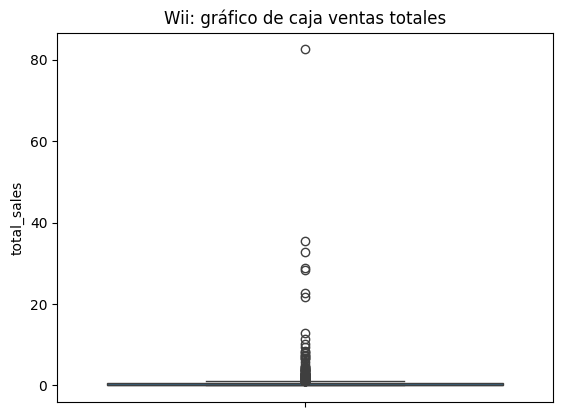

In [242]:
# 3. Traza un diagrama de caja para visualizar la distribución de las ventas

# Wii

Wii_juegos = filtro_top_plataformas[filtro_top_plataformas['platform'] == 'Wii']

print('Estadisticas rápidas ventas totales Wii:\n\n', Wii_juegos['total_sales'].describe())
print()

print('Diagrama de caja ventas totales Wii:')
print()

sns.boxplot(Wii_juegos['total_sales'])

plt.title('Wii: gráfico de caja ventas totales')

Ventas totales Wii zona NA: 486.87

Ventas totales Wii zona EU: 258.32

Ventas totales Wii zona JP: 68.28

Ventas totales Wii zona Other: 77.71



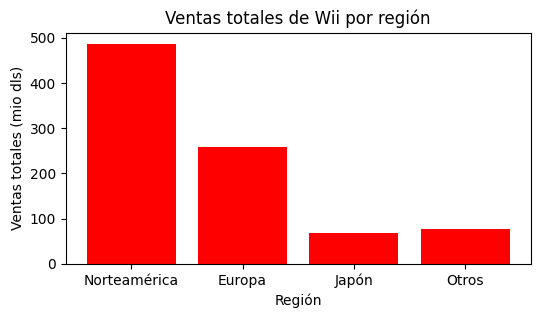

In [243]:
# 4. Ventas totales por país

# Wii

Wii_vtas_na = round(Wii_juegos['na_sales'].sum(),2)

Wii_vtas_eu = round(Wii_juegos['eu_sales'].sum(),2)

Wii_vtas_jp = round(Wii_juegos['jp_sales'].sum(),2)

Wii_vtas_other = round(Wii_juegos['other_sales'].sum(),2)

print('Ventas totales Wii zona NA:', Wii_vtas_na)
print()
print('Ventas totales Wii zona EU:', Wii_vtas_eu)
print()
print('Ventas totales Wii zona JP:', Wii_vtas_jp)
print()
print('Ventas totales Wii zona Other:', Wii_vtas_other)
print()

Wii_vtas_region = [Wii_vtas_na, Wii_vtas_eu, Wii_vtas_jp, Wii_vtas_other]

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, Wii_vtas_region, color='red')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales de Wii por región')

plt.show()

Ventas totales ($ mio dls) registradas por género de juego en Wii:

genre
Sports          286.49
Misc            212.67
Action          106.67
Platform         88.87
Racing           60.13
Simulation       35.57
Shooter          25.69
Fighting         23.36
Adventure        17.70
Puzzle           15.30
Role-Playing     13.71
Strategy          5.02
Name: total_sales, dtype: float64



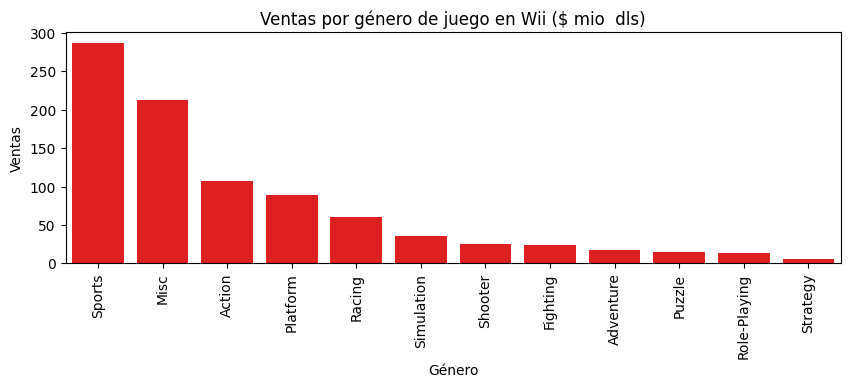

In [244]:
# 5. Ventas por genero de juegos por año

# Wii

Wii_vtas_genero = Wii_juegos.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

print('Ventas totales ($ mio dls) registradas por género de juego en Wii:')
print()
print(Wii_vtas_genero)
print()

plt.figure(figsize=(10,3))
sns.barplot(x=Wii_vtas_genero.index, y=Wii_vtas_genero.values, color='red')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por género de juego en Wii ($ mio  dls)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Ventas registradas por género por año en Wii:

    year_of_release      genre  total_sales
0              2006     Action         8.17
1              2006  Adventure         0.27
2              2006   Fighting         0.61
3              2006       Misc        33.04
4              2006   Platform         0.74
..              ...        ...          ...
88             2014       Misc         2.01
89             2014     Sports         0.56
90             2015     Action         0.19
91             2015       Misc         0.95
92             2016       Misc         0.18

[93 rows x 3 columns]



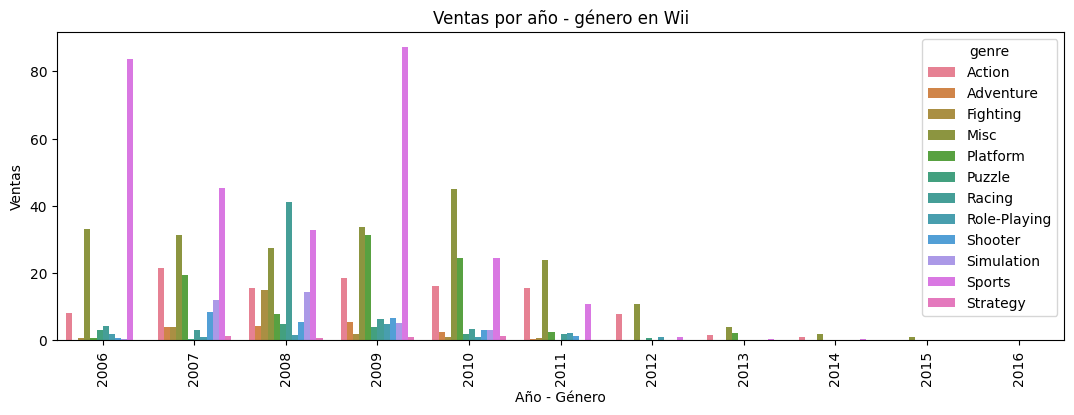

In [245]:
# 7. Ventas por genero de juegos por año

# Wii

Wii_vtas_genero_año = Wii_juegos.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()

print('Ventas registradas por género por año en Wii:')
print()
print(Wii_vtas_genero_año)
print()

plt.figure(figsize=(13,4))
sns.barplot(x='year_of_release', y='total_sales', hue='genre', data= Wii_vtas_genero_año)
plt.xlabel('Año - Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por año - género en Wii')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Juegos registrados con venta por año en Wii:

year_of_release
2006     44
2007    185
2008    282
2009    325
2010    253
2011    143
2012     31
2013     12
2014      6
2015      4
2016      1
Name: name, dtype: int64



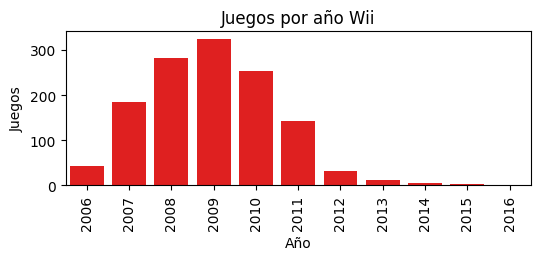

In [246]:
# 7. Cantidad de juegos con ventas por plataforma

# Wii

Wii_juegos_año = Wii_juegos.groupby('year_of_release')['name'].count()

print('Juegos registrados con venta por año en Wii:')
print()
print(Wii_juegos_año)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=Wii_juegos_año.index, y=Wii_juegos_año.values, color='red')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Juegos')
plt.title('Juegos por año Wii')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Juegos por género lanzados en Wii:

genre
Misc            272
Sports          255
Action          229
Racing           91
Simulation       84
Adventure        82
Shooter          61
Platform         57
Puzzle           54
Fighting         41
Role-Playing     35
Strategy         25
Name: name, dtype: int64



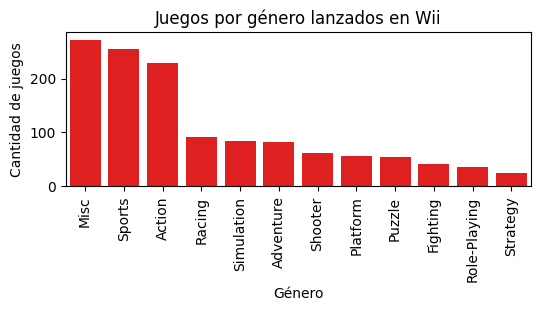

In [247]:
# 8. Cantidad de juegos lanzados por genero

# Wii

Wii_juegos_genero = Wii_juegos.groupby('genre')['name'].count().sort_values(ascending=False)

print('Juegos por género lanzados en Wii:')
print()
print(Wii_juegos_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=Wii_juegos_genero.index, y=Wii_juegos_genero.values, color='red')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por género lanzados en Wii')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [248]:
# 9. Análisis de las evaluaciones de los juegos

# Wii

Wii_critic_mean = Wii_juegos['critic_score'].mean()

Wii_critic_max = Wii_juegos['critic_score'].max()

Wii_critic_min = Wii_juegos['critic_score'].min()

Wii_user_mean = Wii_juegos['user_score'].mean()

Wii_user_max = Wii_juegos['user_score'].max()

Wii_user_min = Wii_juegos['user_score'].min()

print('Critic score promedio:', Wii_critic_mean)
print()
print('Critic score máximo:', Wii_critic_max)
print()
print('Critic score mínimo:', Wii_critic_min)
print()
print('User score promedio:', Wii_user_mean)
print()
print('User score máximo:', Wii_user_max)
print()
print('User score mínimo:', Wii_user_min)
print()


Critic score promedio: 67.10342146189736

Critic score máximo: 97.0

Critic score mínimo: 19.0

User score promedio: 7.104432348367029

User score máximo: 9.3

User score mínimo: 0.2



In [249]:
# 10. Análisis de las evaluaciones de los juegos por género

# Wii

Wii_critic_genre = round(Wii_juegos.groupby('genre')['critic_score'].mean(),2).sort_values(ascending=False)

Wii_user_genre = round(Wii_juegos.groupby('genre')['user_score'].mean(),2).sort_values(ascending=False)

print('Critic score promedio por género Wii:\n\n')
print()
print(Wii_critic_genre)
print()
print('User score promedio por género Wii:\n\n')
print()
print(Wii_user_genre)


Critic score promedio por género Wii:



genre
Strategy        71.52
Sports          70.72
Role-Playing    69.46
Shooter         68.93
Puzzle          68.50
Simulation      67.85
Fighting        67.76
Platform        67.39
Misc            67.14
Adventure       63.88
Action          63.55
Racing          63.38
Name: critic_score, dtype: float64

User score promedio por género Wii:



genre
Role-Playing    7.63
Adventure       7.39
Fighting        7.37
Puzzle          7.35
Simulation      7.26
Strategy        7.21
Sports          7.16
Platform        7.11
Action          7.06
Shooter         7.05
Misc            6.95
Racing          6.68
Name: user_score, dtype: float64


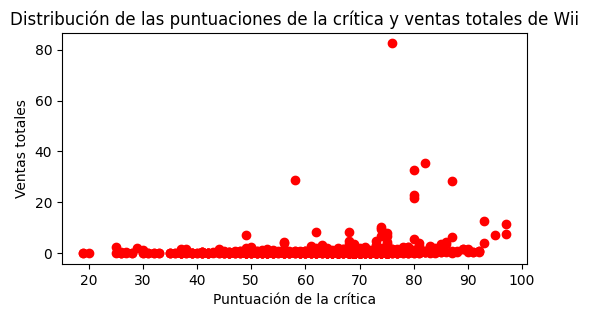

In [250]:
# 11. Gráfico de dispersion critic score

#Wii

plt.figure(figsize=(6,3))

plt.scatter(Wii_juegos['critic_score'], Wii_juegos['total_sales'], color='red')

plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de la crítica y ventas totales de Wii')

plt.show()

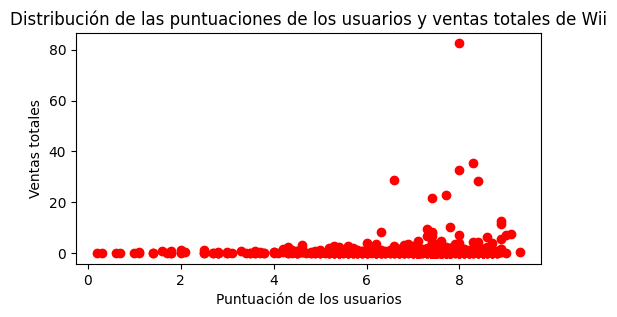

In [251]:
# 12. Gráfico de dispersion user score

#Wii

plt.figure(figsize=(6,3))

plt.scatter(Wii_juegos['user_score'], Wii_juegos['total_sales'], color='red')

plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de los usuarios y ventas totales de Wii')

plt.show()

In [252]:
# 13. Correlación de ventas totales con scores de critica y usuarios

# Wii

print('Correlación ventas totales y critic score Wii:', Wii_juegos['critic_score'].corr(Wii_juegos['total_sales']))
print()
print('Correlación ventas totales y user score Wii:', Wii_juegos['user_score'].corr(Wii_juegos['total_sales']))

Correlación ventas totales y critic score Wii: 0.11071443215383456

Correlación ventas totales y user score Wii: 0.06344122032916201


In [253]:
# 14. Análisis de las rating ESBR y ventas totales

# Wii

Wii_esbr_vtas = round(Wii_juegos.groupby('rating')['total_sales'].sum(),2).sort_values(ascending=False)


print('Ventas Wii por clasificación de juegos ESBR:\n\n')
print(Wii_esbr_vtas)


Ventas Wii por clasificación de juegos ESBR:


rating
E          512.07
E10+       155.05
T          113.05
unknown     96.25
M           14.10
EC           0.66
Name: total_sales, dtype: float64


**Comentarios:  Wii**

* Ventas totales (mio usd) alcanzadas: \$ 891.18
* Ventas máximas (mio usd) alcanzadas en un año: \$ 206.97
* Ventas mínimas (mio usd) alcanzadas en un año: \$ 0.18
* Ventas promedio (mio usd) anuales alcanzadas: \$ 81.02
* Número de años con ventas registradas: 11

En la gráfica “Ventas por año Wii” observamos que desde el primer año se lograron altas ventas de los juegos de esta plataforma, seguido de 4 años de continuo crecimiento, llegando a su punto máximo en 2009, sin embargo, esta plataforma con 11 años de vida solo obtuvo altas ventas los primeros 4 años, a partir de 2010 y los siguientes 6 años las ventas bajaron considerablemente, siendo muy bajas a partir del 2013 en adelante.

En la distribución de las ventas observada en el gráfico de caja, observamos que las distribuciones están en un rango muy corto, muy cerca de la media, y una cantidad importante de valores atípicos fuera de los límites (IQR*1.5).

En la gráfica “Ventas totales de Wii por región” observamos que la región de Norteamérica es la zona con mayor aportación a sus ventas, seguida de Europa , y en este caso las regiones de Japón y Otras aportaron una cantidad similar de ventas.

En “Ventas por género de juego” observamos que los 3 géneros que aportaron la mayor parte de los ingresos son “Sports”, “Misc” y “Action”, estos 3 géneros aportaron consistentemente los mayores ingresos año con año (gráfica “Ventas por año – género X360”). “Role-Playing” y “Strategy” son los géneros que menos aportaron a los ingresos.

Analizando la cantidad de juegos por año encontramos que 2009 es el año con el mayor número de juegos lanzados, al igual que su mejor año de ventas de la plataforma, a partir de 2012 la cantidad de juegos vendidos inicio su descenso continuo hasta el 2016.

Los géneros de juego que cuentan con más lanzamientos son “Misc”, “Sports” y “Action” 2 de estos coincidiendo con los géneros con mayores ventas. Y “Strategy” es el género con menos juegos lanzados.

En cuanto a las evaluaciones de la crítica y los usuarios de los juegos encontramos:

* Critic score promedio: 67.10
* Critic score máximo: 97
* Critic score mínimo: 19
* User score promedio: 7.10
* User score máximo: 9.3
* User score mínimo: 0.2

Haciendo un análisis más profundo del promedio de las calificaciones de la crítica por género encontramos:

* Mejor evaluados top 3: “Strategy”, “Sports”, “Role-Playing”
* Evaluación del género con mayores ventas: “Sports”, se encuentra en el segundo lugar de los mejores evaluados.
* Peor evaluado: “Racing”

De parte de las evaluaciones de los usuarios encontramos:

* Mejor evaluados top 3: “Role-Playing”, “Adventure”, “Fighting”
* Evaluación del género con mayores ventas: “Sports”, evaluación muy cercana a la media de las calificaciones de todos los juegos, es decir, no destaca en las evaluaciones.
* Peor evaluado: “Racing”

La distribución de las puntuaciones de la crítica mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

La distribución de las puntuaciones de los usuarios mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

Realizamos un análisis de correlación entre las calificaciones de la crítica y de los usuarios y las ventas totales:

* Correlación ventas totales y critic score Wii: 0.11071443215383468

En cuanto a las ventas y la evaluación de la crítica, existe correlación positiva, con relación baja de las variables, una mejor evaluación es probable que tenga mayores ventas.

* Correlación ventas totales y user score Wii: 0.06344122032916205

En cuanto a las ventas y la evaluación de usuarios, existe correlación positiva, pero con muy baja relación entre las variables, es decir, una mejor evaluación del usuario no equivale a mejores ventas.

Finalmente, con el análisis de ventas por tipo de clasificación de ESBR comprobamos que los juegos clasificados como “E” (“Everyone”) presentan una considerable mayor venta que los juegos de otras clasificaciones.



**4.3.5 Análisis DS**

In [254]:
# 1. Años activos, maximo y minimo de ventas por top plataformas

# DS

DS_vta = ventas_año_top_plataformas[ventas_año_top_plataformas['platform']== 'DS']

DS_vta = DS_vta[DS_vta['year_of_release'] >= 2004]

DS_tot_vta = DS_vta['total_sales'].sum()

DS_max_vta = DS_vta['total_sales'].max()

DS_min_vta = DS_vta['total_sales'].min()

DS_mean_vta = DS_vta['total_sales'].mean()

DS_años_con_vta = DS_vta['year_of_release'].count()

print('Ventas totales (mio usd) alcanzadas por DS: $', round(DS_tot_vta,2))
print()
print('Ventas máximas (mio usd) alcanzadas en un año por DS: $', round(DS_max_vta,2))
print()
print('Ventas mínimas (mio usd) alcanzadas en un año por DS: $', round(DS_min_vta,2))
print()
print('Ventas promedio (mio usd) anuales alcanzadas por DS: $', round(DS_mean_vta,2))
print()
print('Número de años con ventas registradas por DS:', DS_años_con_vta)
print()


Ventas totales (mio usd) alcanzadas por DS: $ 802.76

Ventas máximas (mio usd) alcanzadas en un año por DS: $ 146.94

Ventas mínimas (mio usd) alcanzadas en un año por DS: $ 1.54

Ventas promedio (mio usd) anuales alcanzadas por DS: $ 80.28

Número de años con ventas registradas por DS: 10



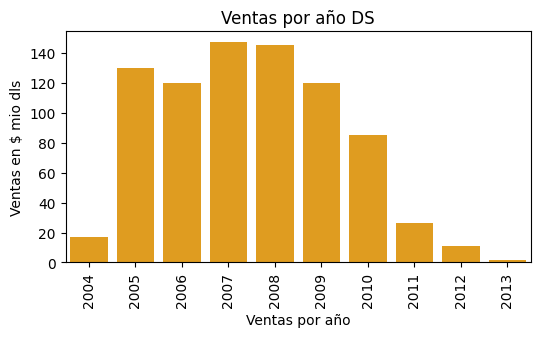


Ventas por año DS:

   platform  year_of_release  total_sales
1        DS             2004        17.27
2        DS             2005       130.14
3        DS             2006       119.81
4        DS             2007       146.94
5        DS             2008       145.31
6        DS             2009       119.54
7        DS             2010        85.02
8        DS             2011        26.18
9        DS             2012        11.01
10       DS             2013         1.54


In [255]:
# 2. Gráfica de barras ventas por año

# DS

plt.figure(figsize=(6,3))
sns.barplot(x=DS_vta['year_of_release'], y=DS_vta['total_sales'], color='orange')
plt.xlabel('Ventas por año', fontsize=10)
plt.ylabel('Ventas en $ mio dls')
plt.title('Ventas por año DS')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()
print('Ventas por año DS:')
print()
print(DS_vta)

Estadisticas rápidas ventas totales DS:

 count    2120.000000
mean        0.378660
std         1.436359
min         0.010000
25%         0.050000
50%         0.110000
75%         0.270000
max        29.800000
Name: total_sales, dtype: float64

Diagrama de caja ventas totales DS:



Text(0.5, 1.0, 'DS: gráfico de caja ventas totales')

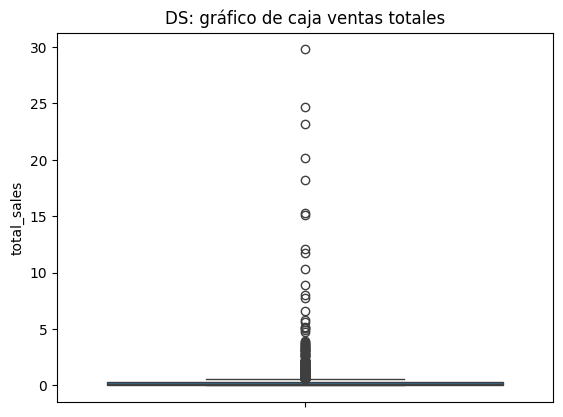

In [256]:
# 3. Traza un diagrama de caja para visualizar la distribución de las ventas

# DS

DS_juegos = filtro_top_plataformas[filtro_top_plataformas['platform'] == 'DS']

DS_juegos = DS_juegos[DS_juegos['year_of_release'] >= 2004]  # Existe un registro erroroneo de un juego lanzado en 1985, con este filtro se elimina este dato

print('Estadisticas rápidas ventas totales DS:\n\n', DS_juegos['total_sales'].describe())
print()

print('Diagrama de caja ventas totales DS:')
print()

sns.boxplot(DS_juegos['total_sales'])

plt.title('DS: gráfico de caja ventas totales')

Ventas totales DS zona NA: 380.31

Ventas totales DS zona EU: 188.41

Ventas totales DS zona JP: 175.0

Ventas totales DS zona Other: 59.04



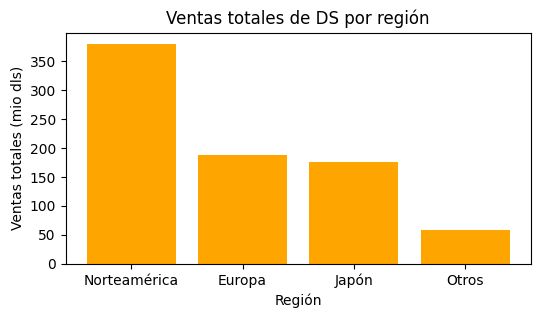

In [257]:
# 4. Ventas totales por país

# DS

DS_vtas_na = round(DS_juegos['na_sales'].sum(),2)

DS_vtas_eu = round(DS_juegos['eu_sales'].sum(),2)

DS_vtas_jp = round(DS_juegos['jp_sales'].sum(),2)

DS_vtas_other = round(DS_juegos['other_sales'].sum(),2)

print('Ventas totales DS zona NA:', DS_vtas_na)
print()
print('Ventas totales DS zona EU:', DS_vtas_eu)
print()
print('Ventas totales DS zona JP:', DS_vtas_jp)
print()
print('Ventas totales DS zona Other:', DS_vtas_other)
print()

DS_vtas_region = [DS_vtas_na, DS_vtas_eu, DS_vtas_jp, DS_vtas_other]

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, DS_vtas_region, color='orange')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales de DS por región')

plt.show()

Ventas totales ($ mio dls) registradas por género de juego en DS:

genre
Misc            135.56
Simulation      129.58
Role-Playing    124.17
Action          111.29
Puzzle           82.09
Platform         75.80
Adventure        45.83
Racing           37.96
Sports           31.27
Strategy         14.27
Shooter           7.86
Fighting          7.08
Name: total_sales, dtype: float64



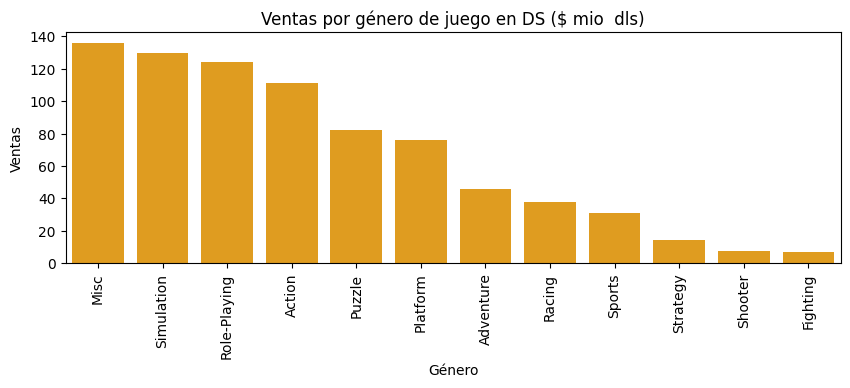

In [258]:
# 5. Ventas por genero de juegos por año

# DS

DS_vtas_genero = DS_juegos.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

print('Ventas totales ($ mio dls) registradas por género de juego en DS:')
print()
print(DS_vtas_genero)
print()

plt.figure(figsize=(10,3))
sns.barplot(x=DS_vtas_genero.index, y=DS_vtas_genero.values, color='orange')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por género de juego en DS ($ mio  dls)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Ventas registradas por género por año en DS:

     year_of_release       genre  total_sales
0               2004      Action         0.50
1               2004   Adventure         0.06
2               2004        Misc         0.34
3               2004    Platform        10.30
4               2004      Puzzle         3.28
..               ...         ...          ...
99              2013   Adventure         0.03
100             2013        Misc         0.08
101             2013    Platform         0.69
102             2013  Simulation         0.21
103             2013      Sports         0.03

[104 rows x 3 columns]



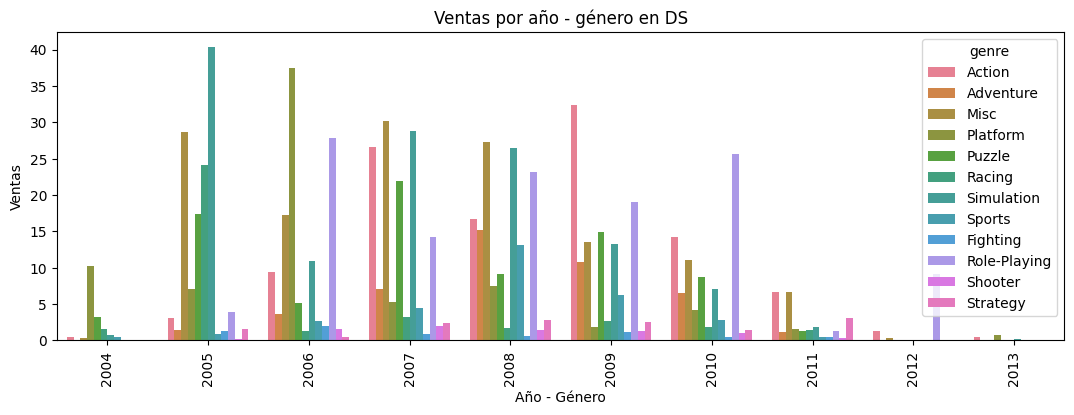

In [259]:
# 7. Ventas por genero de juegos por año

# DS

DS_vtas_genero_año = DS_juegos.groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()

print('Ventas registradas por género por año en DS:')
print()
print(DS_vtas_genero_año)
print()

plt.figure(figsize=(13,4))
sns.barplot(x='year_of_release', y='total_sales', hue='genre', data= DS_vtas_genero_año)
plt.xlabel('Año - Género', fontsize=10)
plt.ylabel('Ventas')
plt.title('Ventas por año - género en DS')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

print()

Juegos registrados con venta por año en DS:

year_of_release
2004     23
2005    118
2006    201
2007    376
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: name, dtype: int64



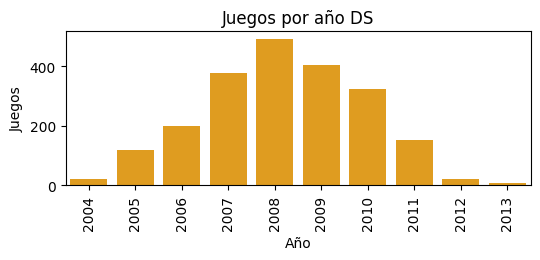

In [260]:
# 7. Cantidad de juegos con ventas por plataforma

# DS

DS_juegos_año = DS_juegos.groupby('year_of_release')['name'].count()

print('Juegos registrados con venta por año en DS:')
print()
print(DS_juegos_año)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=DS_juegos_año.index, y=DS_juegos_año.values, color='orange')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Juegos')
plt.title('Juegos por año DS')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Juegos por género lanzados en DS:

genre
Misc            387
Action          332
Simulation      278
Adventure       236
Puzzle          234
Role-Playing    196
Sports          146
Platform         89
Strategy         78
Racing           66
Shooter          42
Fighting         36
Name: name, dtype: int64



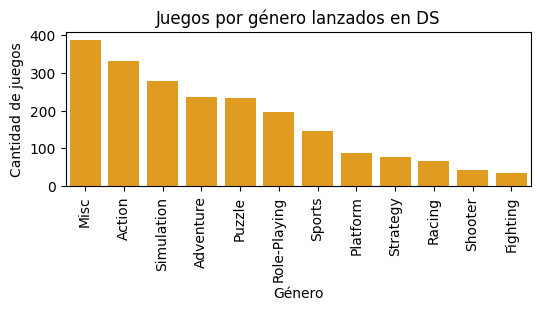

In [261]:
# 8. Cantidad de juegos lanzados por genero

# DS

DS_juegos_genero = DS_juegos.groupby('genre')['name'].count().sort_values(ascending=False)

print('Juegos por género lanzados en DS:')
print()
print(DS_juegos_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=DS_juegos_genero.index, y=DS_juegos_genero.values, color='orange')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por género lanzados en DS')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [262]:
# 9. Análisis de las evaluaciones de los juegos

# DS

DS_critic_mean = DS_juegos['critic_score'].mean()

DS_critic_max = DS_juegos['critic_score'].max()

DS_critic_min = DS_juegos['critic_score'].min()

DS_user_mean = DS_juegos['user_score'].mean()

DS_user_max = DS_juegos['user_score'].max()

DS_user_min = DS_juegos['user_score'].min()

print('Critic score promedio:', DS_critic_mean)
print()
print('Critic score máximo:', DS_critic_max)
print()
print('Critic score mínimo:', DS_critic_min)
print()
print('User score promedio:', DS_user_mean)
print()
print('User score máximo:', DS_user_max)
print()
print('User score mínimo:', DS_user_min)
print()


Critic score promedio: 67.73254716981133

Critic score máximo: 93.0

Critic score mínimo: 19.0

User score promedio: 7.336981132075471

User score máximo: 9.5

User score mínimo: 0.0



In [263]:
# 10. Análisis de las evaluaciones de los juegos por género

# DS

DS_critic_genre = round(DS_juegos.groupby('genre')['critic_score'].mean(),2).sort_values(ascending=False)

DS_user_genre = round(DS_juegos.groupby('genre')['user_score'].mean(),2).sort_values(ascending=False)

print('Critic score promedio por género DS:\n\n')
print()
print(DS_critic_genre)
print()
print('User score promedio por género DS:\n\n')
print()
print(DS_user_genre)


Critic score promedio por género DS:



genre
Sports          71.87
Role-Playing    71.60
Strategy        69.72
Puzzle          68.56
Simulation      68.45
Fighting        68.31
Platform        68.18
Misc            68.09
Shooter         68.07
Adventure       64.84
Racing          64.30
Action          64.07
Name: critic_score, dtype: float64

User score promedio por género DS:



genre
Role-Playing    7.72
Strategy        7.60
Platform        7.55
Adventure       7.46
Puzzle          7.42
Sports          7.40
Simulation      7.37
Fighting        7.29
Shooter         7.29
Action          7.17
Racing          7.16
Misc            7.06
Name: user_score, dtype: float64


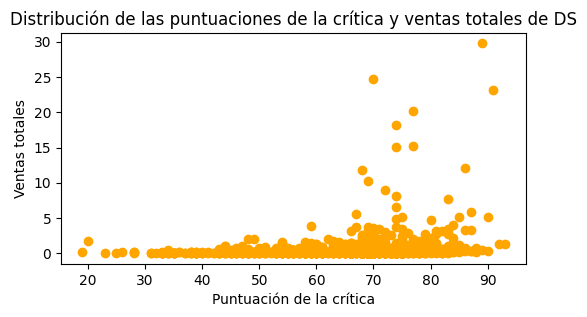

In [264]:
# 11. Gráfico de dispersion critic score

# DS

plt.figure(figsize=(6,3))

plt.scatter(DS_juegos['critic_score'], DS_juegos['total_sales'], color='orange')

plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de la crítica y ventas totales de DS')

plt.show()

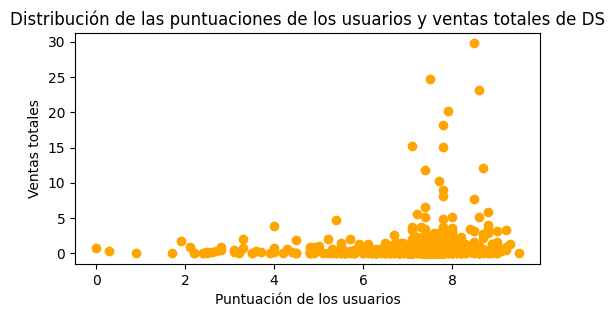

In [265]:
# 12. Gráfico de dispersion user score

# DS

plt.figure(figsize=(6,3))

plt.scatter(DS_juegos['user_score'], DS_juegos['total_sales'], color='orange')

plt.xlabel('Puntuación de los usuarios')
plt.ylabel('Ventas totales')
plt.title('Distribución de las puntuaciones de los usuarios y ventas totales de DS')

plt.show()

In [266]:
# 13. Correlación de ventas totales con scores de critica y usuarios

# DS

print('Correlación ventas totales y critic score DS:', DS_juegos['critic_score'].corr(DS_juegos['total_sales']))
print()
print('Correlación ventas totales y user score DS:', DS_juegos['user_score'].corr(DS_juegos['total_sales']))

Correlación ventas totales y critic score DS: 0.1372199980376433

Correlación ventas totales y user score DS: 0.06469427908919115


In [267]:
# 14. Análisis de las rating ESBR y ventas totales

# DS

DS_esbr_vtas = round(DS_juegos.groupby('rating')['total_sales'].sum(),2).sort_values(ascending=False)


print('Ventas DS por clasificación de juegos ESBR:\n\n')

print(DS_esbr_vtas)


Ventas DS por clasificación de juegos ESBR:


rating
E          432.88
unknown    243.86
E10+        94.99
T           27.83
M            2.55
EC           0.65
Name: total_sales, dtype: float64


**Comentarios:  DS**

* Ventas totales (mio usd) alcanzadas: \$ 802.76
* Ventas máximas (mio usd) alcanzadas en un año: \$ 146.94
* Ventas mínimas (mio usd) alcanzadas en un año: \$ 1.54
* Ventas promedio (mio usd) anuales alcanzadas: \$ 80.28
* Número de años con ventas registradas: 10

En la gráfica “Ventas por año DS” observamos un crecimiento importante de ventas en el segundo año de lanzamiento con una ligera baja en 2006 pero llegando al pico de ventas en el año 2007 y un resultado muy similar en 2008. A partir del año 2009 las ventas comienzan a descender constantemente hasta el año 2013.

En la distribución de las ventas observada en el gráfico de caja, observamos que las distribuciones están en un rango muy corto, muy cerca de la media, y una cantidad importante de valores atípicos fuera de los límites (IQR*1.5).

En la gráfica “Ventas totales de DS por región” observamos que la región de Norteamérica es la zona con mayor aportación a sus ventas, Europa y Japón aportaron un monto similar de ventas.

En “Ventas por género de juego” observamos que los 3 géneros que aportaron la mayor parte de los ingresos son “Misc”, “Simulation” y “Role-playing”, estos 3 géneros aportaron consistentemente los mayores ingresos año con año (gráfica “Ventas por año – género X360”) y a diferencia de otras plataformas los ingresos están mejor distribuidos a lo largo de los géneros. “Shooter” y “Fighting” son los géneros que menos aportaron a los ingresos.

Analizando la cantidad de juegos por año encontramos que 2008 es el año con la mayor cantidad de juegos lanzados, es decir, después de 4 años de su lanzamiento de la plataforma se alcanzó el pico de juegos, y a partir del siguiente año 2009 inicio a descender la cantidad de estos.

Los géneros de juego que cuentan con más lanzamientos son “Misc”, “Action” y “Simulation” .  “Fighting” es el género con menos juegos lanzados.

En cuanto a las evaluaciones de la crítica y los usuarios de los juegos encontramos:

* Critic score promedio: 67.73
* Critic score máximo: 93
* Critic score mínimo: 19
* User score promedio: 7.34
* User score máximo: 9.5
* User score mínimo: 0

Haciendo un análisis más profundo del promedio de las calificaciones de la crítica por género encontramos:

* Mejor evaluados top 3: “Sports”, “Role-Playing”, “Strategy”
* Evaluación del género con mayores ventas: “Misc”, se encuentra por debajo de la calificación media, es decir, buenas ventas, pero no destaca por sus evaluaciones.
* Peor evaluado: “Action”

De parte de las evaluaciones de los usuarios encontramos:

* Mejor evaluados top 3: “Role-Playing”, “Strategy”, “Platform” 
* Evaluación del género con mayores ventas: “Misc”, se encuentra en el último lugar de evaluaciones, es decir, buenas ventas, pero no destaca por sus evaluaciones.
* Peor evaluado: “Misc”, el género de mayor venta es el peor evaluado por los usuarios.

La distribución de las puntuaciones de la crítica mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

La distribución de las puntuaciones de los usuarios mostrados en las gráficas de dispersión encontramos que los juegos de calificación cercanos a la media y superior a esta presentan mejores ventas.

Realizamos un análisis de correlación entre las calificaciones de la crítica y de los usuarios y las ventas totales:

* Correlación ventas totales y critic score DS: 0.13721999803764345

En cuanto a las ventas y la evaluación de la crítica, existe correlación positiva, pero con muy baja relación entre las variables, es decir, una mejor evaluación de la crítica no equivale a mejores ventas.

* Correlación ventas totales y user score DS: 0.0646942790891911

En cuanto a las ventas y la evaluación de usuarios, existe correlación positiva, pero con muy baja relación entre las variables, es decir, una mejor evaluación del usuario no equivale a mejores ventas.

Finalmente, con el análisis de ventas por tipo de clasificación de ESBR comprobamos que los juegos clasificados como “E” (“Everyone”) presentan una considerable mayor venta que los juegos de otras clasificaciones.



# **5. Perfil de usuario por región**

**5.1 Market share por región**

Venta total de videojuegos $ mio de dls:

Venta global: $ 8915.71

Región NA: $ 4402.35, 49.4% de marketshare.

Región EU: $ 2424.67, 27.2% de marketshare.

Región JP: $ 1297.37, 14.6% de marketshare.

Región Other: $ 791.32, 8.9% de marketshare.



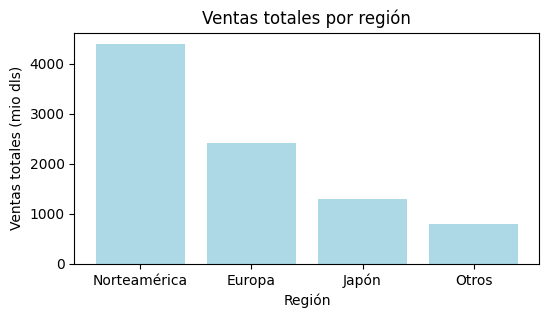

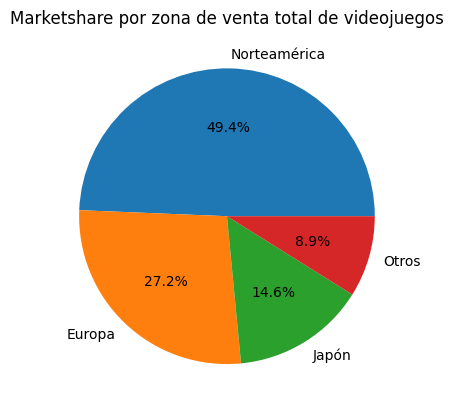

In [268]:
# Venta total de juegos por cada región

NA_venta = games['na_sales'].sum()

EU_venta = games['eu_sales'].sum()

JP_venta = games['jp_sales'].sum()

Other_venta = games['other_sales'].sum()

global_venta = round(NA_venta + EU_venta + JP_venta + Other_venta,2)

ventas_regiones = [NA_venta, EU_venta, JP_venta, Other_venta]

na_ms = round((NA_venta/global_venta)*100,1)

eu_ms = round((EU_venta/global_venta)*100,1)

jp_ms = round((JP_venta/global_venta)*100,1)

other_ms = round((Other_venta/global_venta)*100,1)

print('Venta total de videojuegos $ mio de dls:')
print()
print('Venta global: $', global_venta)
print()
print(f'Región NA: $ {NA_venta}, {na_ms}% de marketshare.')
print()
print(f'Región EU: $ {EU_venta}, {eu_ms}% de marketshare.')
print()
print(f'Región JP: $ {JP_venta}, {jp_ms}% de marketshare.')
print()
print(f'Región Other: $ {Other_venta}, {other_ms}% de marketshare.')
print()

regiones = ['Norteamérica', 'Europa', 'Japón', 'Otros']

plt.figure(figsize=(6,3))

plt.bar(regiones, ventas_regiones, color='lightblue')

plt.xlabel('Región')
plt.ylabel('Ventas totales (mio dls)')
plt.title('Ventas totales por región')

plt.show()

print()

valores = [na_ms, eu_ms, jp_ms, other_ms]

# Crear el gráfico de pastel
plt.pie(valores, labels=regiones, autopct='%1.1f%%')
plt.title('Marketshare por zona de venta total de videojuegos')
plt.show()

**5.2 Región NA - Norteamérica**

In [269]:
# 1 Filtro de datos de la región NA

NA_juegos = games[games['na_sales']> 0]

print(NA_juegos.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          69.0         7.7  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          74.0         7.8  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

Venta por años de la región NA:

year_of_release
1980     10.59
1981     33.40
1982     26.92
1983      7.76
1984     33.28
1985     33.73
1986     12.50
1987      8.46
1988     23.87
1989     45.15
1990     25.46
1991     12.76
1992     33.89
1993     16.90
1994     28.16
1995     24.83
1996     86.76
1997     94.75
1998    128.36
1999    126.06
2000     94.50
2001    173.98
2002    216.19
2003    193.61
2004    222.51
2005    242.15
2006    262.13
2007    309.89
2008    348.69
2009    335.55
2010    300.65
2011    238.79
2012    153.26
2013    153.65
2014    132.27
2015    106.86
2016     44.93
Name: na_sales, dtype: float64


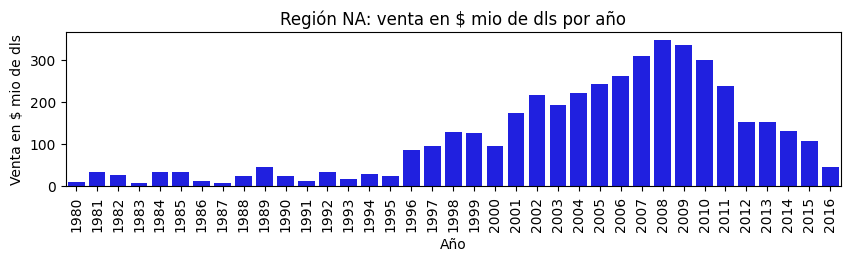

In [270]:
# Ventas de región por año

# NA

na_años = NA_juegos[NA_juegos['year_of_release']>0]

na_vta_años = na_años.groupby('year_of_release')['na_sales'].sum()

print('Venta por años de la región NA:')
print()
print(na_vta_años)

plt.figure(figsize=(10,2))
sns.barplot(x= na_vta_años.index, y= na_vta_años.values, color='blue')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Venta en $ mio de dls')
plt.title('Región NA: venta en $ mio de dls por año')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas totales por plataforma en la región NA:

   platform  na_sales
0      X360    602.47
1       PS2    583.84
2       Wii    496.90
3       PS3    393.49
4        DS    382.40
5        PS    336.52
6       GBA    187.54
7        XB    186.69
8       N64    139.02
9        GC    133.46
10      NES    125.94
11       GB    114.32
12      PSP    109.17
13      PS4    108.74
14       PC     94.53
15     XOne     93.12
16     2600     90.60
17      3DS     83.49
18     SNES     61.23
19     WiiU     38.10
20      GEN     21.05
21      PSV     12.58
22       DC      5.43
23      SCD      1.00
24      SAT      0.72



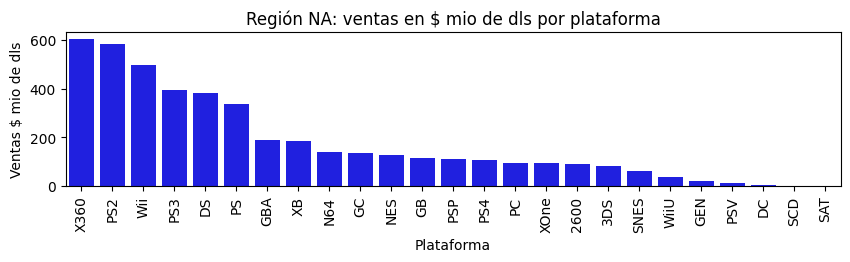

In [271]:
# 2 Ventas totales plataformas en la región

# NA

NA_vtas_plataformas = NA_juegos.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas totales por plataforma en la región NA:')
print()
print(NA_vtas_plataformas)
print()

plt.figure(figsize=(10,2))
sns.barplot(x=NA_vtas_plataformas['platform'], y=NA_vtas_plataformas['na_sales'], color='blue')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región NA: ventas en $ mio de dls por plataforma')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 plataformas con mayor venta región NA:

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40



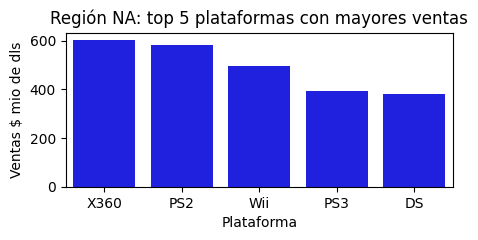

In [272]:
# 3 Top 5 ventas totales plataformas en la región

# NA

NA_top_plataformas = NA_vtas_plataformas.iloc[0:5]

print('Top 5 plataformas con mayor venta región NA:')
print()
print(NA_top_plataformas)
print()

plt.figure(figsize=(5,2))
sns.barplot(x=NA_top_plataformas['platform'], y=NA_top_plataformas['na_sales'], color='blue')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región NA: top 5 plataformas con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas por género de la región NA:

           genre  na_sales
0         Action    879.01
1         Sports    684.43
2        Shooter    592.24
3       Platform    445.50
4           Misc    407.27
5         Racing    359.35
6   Role-Playing    330.81
7       Fighting    223.36
8     Simulation    181.92
9         Puzzle    122.87
10     Adventure    105.26
11      Strategy     68.55
12       unknown      1.78



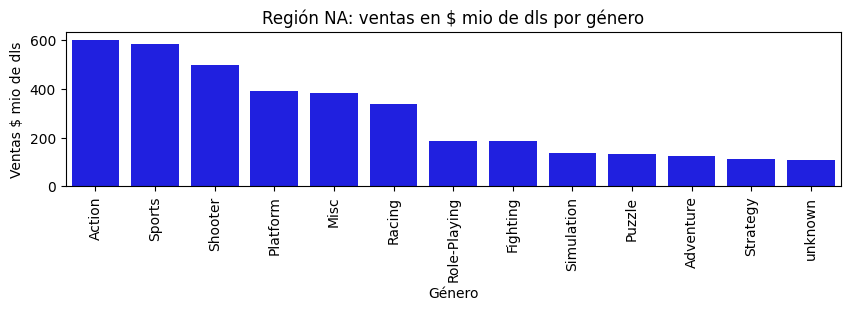

In [273]:
# 4 Ventas por género por región

# NA

NA_vtas_genero = NA_juegos.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por género de la región NA:')
print()
print(NA_vtas_genero)
print()

plt.figure(figsize=(10,2))
sns.barplot(x=NA_vtas_genero['genre'], y=NA_vtas_plataformas['na_sales'], color='blue')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región NA: ventas en $ mio de dls por género')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 géneros con mayor venta región NA:

      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27



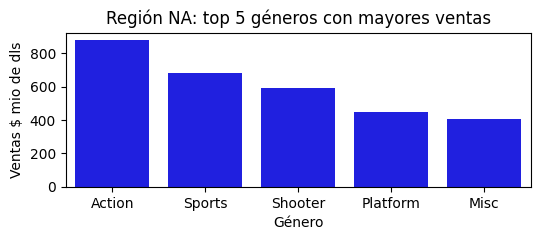

In [274]:
# 5 Top 5 Ventas por género por región

# NA

NA_top_genero =  NA_vtas_genero.iloc[0:5]

print('Top 5 géneros con mayor venta región NA:')
print()
print(NA_top_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=NA_top_genero['genre'], y=NA_top_genero['na_sales'], color='blue')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región NA: top 5 géneros con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [275]:
# 6 Top 10 Ventas por género y plataforma por región

# NA

NA_top_plataformas_list = NA_vtas_plataformas['platform'].iloc[0:5]

NA_filtro_top_plataformas = NA_juegos[NA_juegos['platform'].isin(NA_top_plataformas_list)]

NA_vtas_genero_plataforma = NA_filtro_top_plataformas.groupby(['platform','genre'])['na_sales'].sum().sort_values(ascending=False).reset_index()

NA_top_genero_plataforma = NA_vtas_genero_plataforma.iloc[0:11]

print('Top 10 de mayores ventas plataforma - género de la región NA:')
print()
print(NA_top_genero_plataforma)

Top 10 de mayores ventas plataforma - género de la región NA:

   platform    genre  na_sales
0      X360  Shooter    174.51
1       Wii   Sports    149.72
2      X360   Action    141.66
3       PS2   Sports    134.12
4       PS2   Action    127.82
5       PS3   Action    121.47
6       Wii     Misc    118.82
7      X360   Sports     90.02
8       PS3  Shooter     82.03
9       PS2   Racing     75.72
10      Wii   Action     68.07


Ventas por clasificación ESBR de la región NA:

    rating  na_sales
0        E   1292.99
1  unknown   1242.46
2        T    759.75
3        M    748.48
4     E10+    353.32
5      K-A      2.56
6       EC      1.53
7       AO      1.26



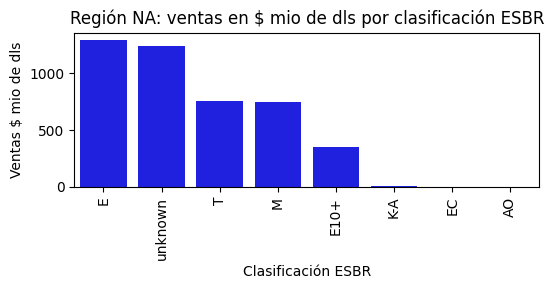

In [276]:
# 7 Ventas por clasificación ESBR  por región

# NA

NA_vtas_esbr = NA_juegos.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por clasificación ESBR de la región NA:')
print()
print(NA_vtas_esbr)
print()

plt.figure(figsize=(6,2))
sns.barplot(x=NA_vtas_esbr['rating'], y=NA_vtas_esbr['na_sales'], color='blue')
plt.xlabel('Clasificación ESBR', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región NA: ventas en $ mio de dls por clasificación ESBR')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

**5.3 Región EU - Europa**

In [277]:
# 1 Filtro de datos de la región EU

eu_juegos = games[games['eu_sales']> 0]

print(eu_juegos.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          69.0         7.7  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          74.0         7.8  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

Venta por años de la región EU:

year_of_release
1980      0.67
1981      1.96
1982      1.65
1983      0.80
1984      2.10
1985      4.74
1986      2.84
1987      1.41
1988      6.59
1989      8.44
1990      7.63
1991      3.95
1992     11.71
1993      5.18
1994     14.88
1995     14.90
1996     47.26
1997     48.32
1998     66.90
1999     62.67
2000     52.77
2001     94.89
2002    109.75
2003    103.81
2004    107.28
2005    121.11
2006    127.89
2007    157.82
2008    181.14
2009    187.94
2010    171.42
2011    162.97
2012    114.59
2013    121.55
2014    122.74
2015     96.72
2016     51.22
Name: eu_sales, dtype: float64


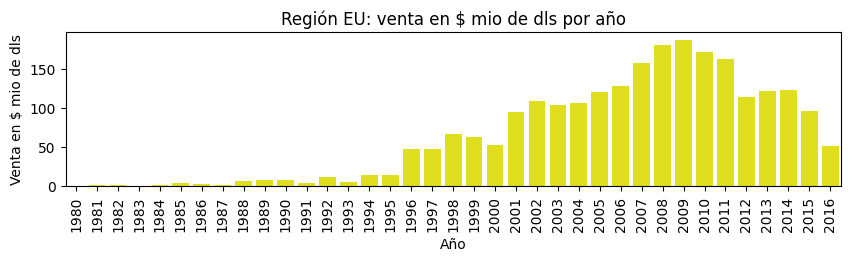

In [278]:
# Ventas de región por año

# NA

eu_años = eu_juegos[eu_juegos['year_of_release']>0]

eu_vta_años = eu_años.groupby('year_of_release')['eu_sales'].sum()

print('Venta por años de la región EU:')
print()
print(eu_vta_años)

plt.figure(figsize=(10,2))
sns.barplot(x= eu_vta_años.index, y= eu_vta_años.values, color='yellow')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Venta en $ mio de dls')
plt.title('Región EU: venta en $ mio de dls por año')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas totales por plataforma en la región EU:

   platform  eu_sales
0       PS2    339.29
1       PS3    330.29
2      X360    270.76
3       Wii    262.21
4        PS    213.61
5        DS    188.89
6        PC    142.44
7       PS4    141.09
8       GBA     75.25
9       PSP     66.68
10      3DS     61.48
11       XB     60.95
12     XOne     51.59
13       GB     47.82
14      N64     41.06
15       GC     38.71
16     WiiU     25.13
17      NES     21.15
18     SNES     19.04
19      PSV     13.12
20      GEN      6.05
21     2600      5.47
22       DC      1.69
23      SAT      0.54
24      SCD      0.36



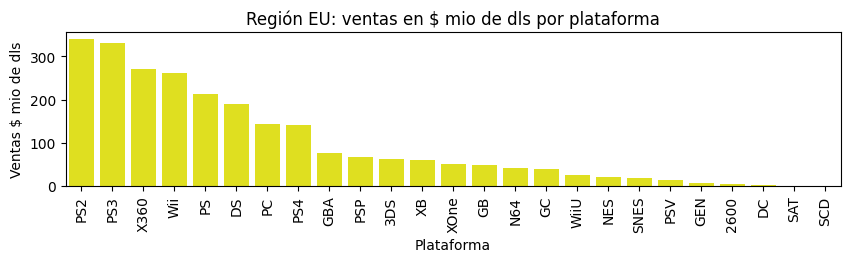

In [279]:
# 2 Ventas totales plataformas en la región

# EU

eu_vtas_plataformas = eu_juegos.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas totales por plataforma en la región EU:')
print()
print(eu_vtas_plataformas)
print()

plt.figure(figsize=(10,2))
sns.barplot(x= eu_vtas_plataformas['platform'], y= eu_vtas_plataformas['eu_sales'], color='yellow')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región EU: ventas en $ mio de dls por plataforma')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 plataformas con mayor venta región EU:

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61



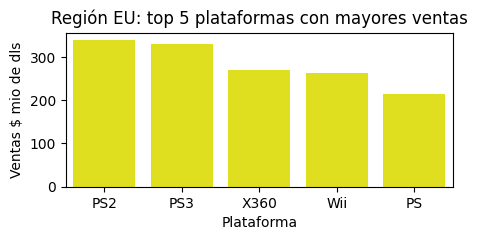

In [280]:
# 3 Top 5 ventas totales plataformas en la región

# EU

eu_top_plataformas = eu_vtas_plataformas.iloc[0:5]

print('Top 5 plataformas con mayor venta región EU:')
print()
print(eu_top_plataformas)
print()

plt.figure(figsize=(5,2))
sns.barplot(x= eu_top_plataformas['platform'], y= eu_top_plataformas['eu_sales'], color='yellow')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región EU: top 5 plataformas con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas por género de la región EU:

           genre  eu_sales
0         Action    519.13
1         Sports    376.79
2        Shooter    317.34
3         Racing    236.51
4           Misc    212.74
5       Platform    200.35
6   Role-Playing    188.71
7     Simulation    113.52
8       Fighting    100.33
9      Adventure     63.54
10        Puzzle     50.01
11      Strategy     45.17
12       unknown      0.53



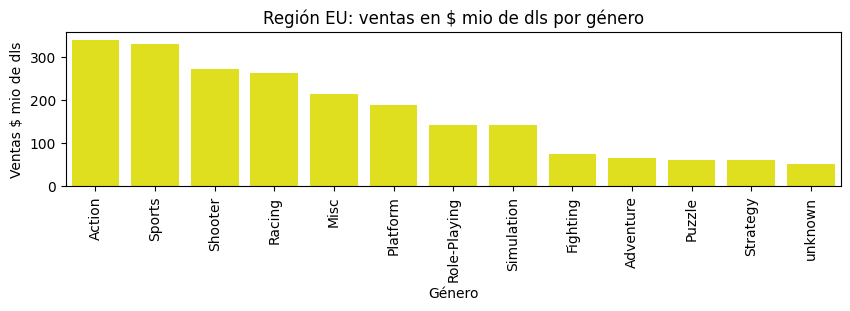

In [281]:
# 4 Ventas por género por región

# EU

eu_vtas_genero = eu_juegos.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por género de la región EU:')
print()
print(eu_vtas_genero)
print()

plt.figure(figsize=(10,2))
sns.barplot(x= eu_vtas_genero['genre'], y= eu_vtas_plataformas['eu_sales'], color='yellow')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región EU: ventas en $ mio de dls por género')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 géneros con mayor venta región EU:

     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74



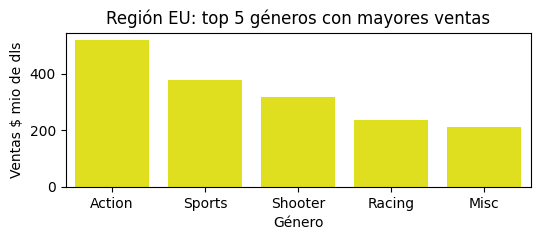

In [282]:
# 5 Top 5 Ventas por género por región

# EU

eu_top_genero =  eu_vtas_genero.iloc[0:5]

print('Top 5 géneros con mayor venta región EU:')
print()
print(eu_top_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x= eu_top_genero['genre'], y= eu_top_genero['eu_sales'], color='yellow')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región EU: top 5 géneros con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [283]:
# 6 Top 10 Ventas por género y plataforma por región

# EU

eu_top_plataformas_list = eu_vtas_plataformas['platform'].iloc[0:5]

eu_filtro_top_plataformas = eu_juegos[eu_juegos['platform'].isin(eu_top_plataformas_list)]

eu_vtas_genero_plataforma = eu_filtro_top_plataformas.groupby(['platform','genre'])['eu_sales'].sum().sort_values(ascending=False).reset_index()

eu_top_genero_plataforma = eu_vtas_genero_plataforma.iloc[0:11]

print('Top 10 de mayores ventas plataforma - género de la región EU:')
print()
print(eu_top_genero_plataforma)

Top 10 de mayores ventas plataforma - género de la región EU:

   platform    genre  eu_sales
0       PS3   Action    105.95
1       Wii   Sports     93.78
2      X360  Shooter     74.58
3      X360   Action     73.63
4       PS3  Shooter     72.64
5       PS2   Action     71.44
6       PS2   Sports     69.96
7       Wii     Misc     63.93
8       PS2   Racing     47.38
9       PS3   Sports     46.64
10       PS   Action     45.13


Ventas por clasificación ESBR de la región EU:

    rating  eu_sales
0        E    710.25
1  unknown    613.83
2        M    483.97
3        T    427.03
4     E10+    188.52
5       AO      0.61
6      K-A      0.27
7       EC      0.11
8       RP      0.08



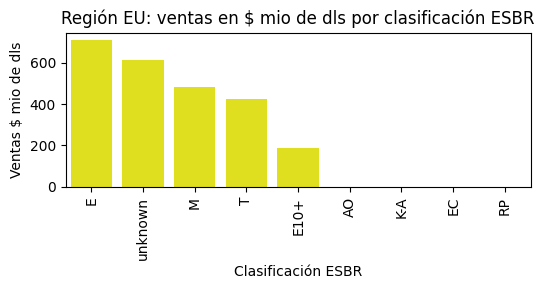

In [284]:
# 7 Ventas por clasificación ESBR  por región

# EU

eu_vtas_esbr = eu_juegos.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por clasificación ESBR de la región EU:')
print()
print(eu_vtas_esbr)
print()

plt.figure(figsize=(6,2))
sns.barplot(x= eu_vtas_esbr['rating'], y= eu_vtas_esbr['eu_sales'], color='yellow')
plt.xlabel('Clasificación ESBR', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región EU: ventas en $ mio de dls por clasificación ESBR')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

**5.4 Región JP - Japón**

In [285]:
# 1 Filtro de datos de la región JP

jp_juegos = games[games['jp_sales']> 0]

print(jp_juegos.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          69.0         7.7  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          74.0         7.8  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

Venta por años de la región JP:

year_of_release
1983     8.10
1984    14.27
1985    14.56
1986    19.81
1987    11.63
1988    15.76
1989    18.36
1990    14.88
1991    14.78
1992    28.91
1993    25.36
1994    33.99
1995    45.75
1996    57.44
1997    48.87
1998    50.04
1999    52.34
2000    42.77
2001    39.86
2002    41.76
2003    34.20
2004    41.65
2005    54.27
2006    73.74
2007    60.29
2008    60.25
2009    61.89
2010    59.49
2011    53.07
2012    51.80
2013    47.69
2014    39.69
2015    34.09
2016    19.31
Name: jp_sales, dtype: float64


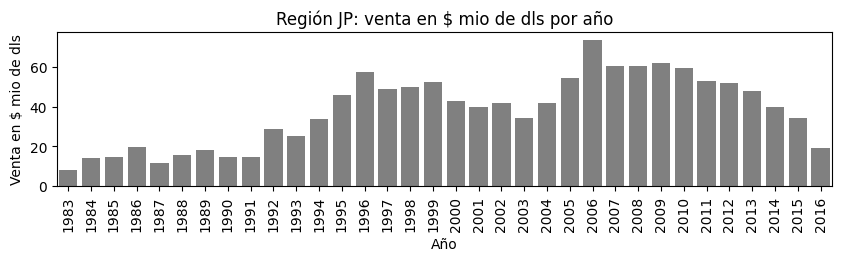

In [286]:
# Ventas de región por año

# jp

jp_años = jp_juegos[jp_juegos['year_of_release']>0]

jp_vta_años = jp_años.groupby('year_of_release')['jp_sales'].sum()

print('Venta por años de la región JP:')
print()
print(jp_vta_años)

plt.figure(figsize=(10,2))
sns.barplot(x= jp_vta_años.index, y= jp_vta_años.values, color='gray')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Venta en $ mio de dls')
plt.title('Región JP: venta en $ mio de dls por año')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas totales por plataforma en la región JP:

   platform  jp_sales
0        DS    175.57
1        PS    139.82
2       PS2    139.20
3      SNES    116.55
4       3DS    100.67
5       NES     98.65
6        GB     85.12
7       PS3     80.19
8       PSP     76.78
9       Wii     69.33
10      GBA     47.33
11      N64     34.22
12      SAT     32.26
13      PSV     21.91
14       GC     21.58
15      PS4     15.96
16     WiiU     13.01
17     X360     12.43
18       DC      8.56
19      GEN      2.70
20       NG      1.44
21       WS      1.42
22       XB      1.38
23      SCD      0.45
24     XOne      0.34
25       PC      0.17
26     TG16      0.16
27      3DO      0.10
28       GG      0.04
29     PCFX      0.03



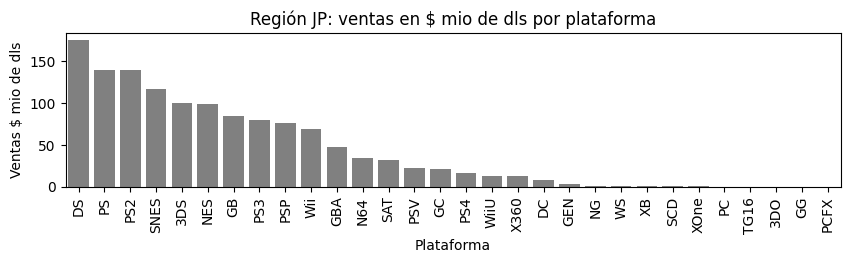

In [287]:
# 2 Ventas totales plataformas en la región

# JP

jp_vtas_plataformas = jp_juegos.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas totales por plataforma en la región JP:')
print()
print(jp_vtas_plataformas)
print()

plt.figure(figsize=(10,2))
sns.barplot(x= jp_vtas_plataformas['platform'], y= jp_vtas_plataformas['jp_sales'], color='gray')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región JP: ventas en $ mio de dls por plataforma')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 plataformas con mayor venta región JP:

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67



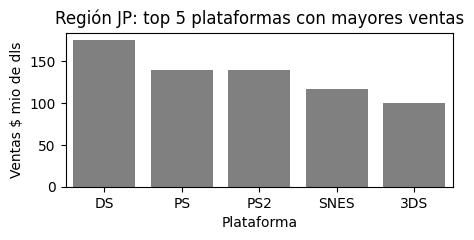

In [288]:
# 3 Top 5 ventas totales plataformas en la región

# JP

jp_top_plataformas = jp_vtas_plataformas.iloc[0:5]

print('Top 5 plataformas con mayor venta región JP:')
print()
print(jp_top_plataformas)
print()

plt.figure(figsize=(5,2))
sns.barplot(x= jp_top_plataformas['platform'], y= jp_top_plataformas['jp_sales'], color='gray')
plt.xlabel('Plataforma', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región JP: top 5 plataformas con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Ventas por género de la región JP:

           genre  jp_sales
0   Role-Playing    355.41
1         Action    161.43
2         Sports    135.54
3       Platform    130.83
4           Misc    108.11
5       Fighting     87.48
6     Simulation     63.80
7         Puzzle     57.31
8         Racing     56.71
9      Adventure     52.30
10      Strategy     49.66
11       Shooter     38.76
12       unknown      0.03



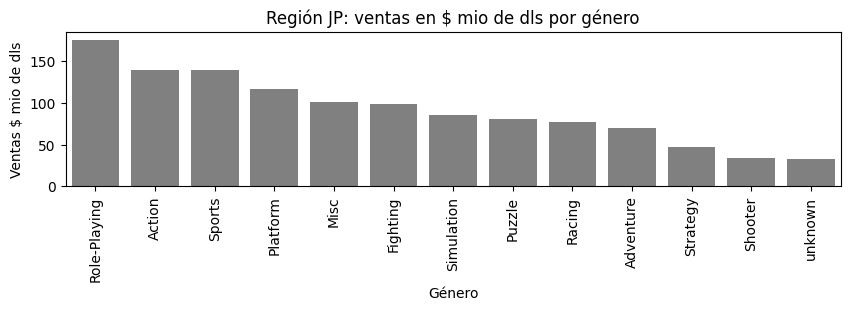

In [289]:
# 4 Ventas por género por región

# JP

jp_vtas_genero = jp_juegos.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por género de la región JP:')
print()
print(jp_vtas_genero)
print()

plt.figure(figsize=(10,2))
sns.barplot(x= jp_vtas_genero['genre'], y= jp_vtas_plataformas['jp_sales'], color='gray')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región JP: ventas en $ mio de dls por género')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Top 5 géneros con mayor venta región JP:

          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11



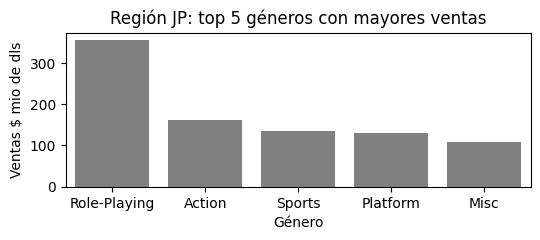

In [290]:
# 5 Top 5 Ventas por género por región

# JP

jp_top_genero = jp_vtas_genero.iloc[0:5]

print('Top 5 géneros con mayor venta región JP:')
print()
print(jp_top_genero)
print()

plt.figure(figsize=(6,2))
sns.barplot(x= jp_top_genero['genre'], y= jp_top_genero['jp_sales'], color='gray')
plt.xlabel('Género', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región JP: top 5 géneros con mayores ventas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [291]:
# 6 Top 10 Ventas por género y plataforma por región

# JP

jp_top_plataformas_list = jp_vtas_plataformas['platform'].iloc[0:5]

jp_filtro_top_plataformas = jp_juegos[jp_juegos['platform'].isin(jp_top_plataformas_list)]

jp_vtas_genero_plataforma = jp_filtro_top_plataformas.groupby(['platform','genre'])['jp_sales'].sum().sort_values(ascending=False).reset_index()

jp_top_genero_plataforma = jp_vtas_genero_plataforma.iloc[0:11]

print('Top 10 de mayores ventas plataforma - género de la región JP:')
print()
print(jp_top_genero_plataforma)

Top 10 de mayores ventas plataforma - género de la región JP:

   platform         genre  jp_sales
0        DS  Role-Playing     54.55
1       3DS  Role-Playing     41.99
2        PS  Role-Playing     40.95
3        DS          Misc     37.33
4       PS2  Role-Playing     34.01
5      SNES  Role-Playing     33.76
6       PS2        Action     25.81
7       PS2        Sports     24.74
8       3DS        Action     22.66
9      SNES      Platform     20.42
10       PS        Sports     18.43


Ventas por clasificación ESBR de la región JP:

    rating  jp_sales
0  unknown    841.96
1        E    198.11
2        T    151.40
3        M     64.24
4     E10+     40.20
5      K-A      1.46



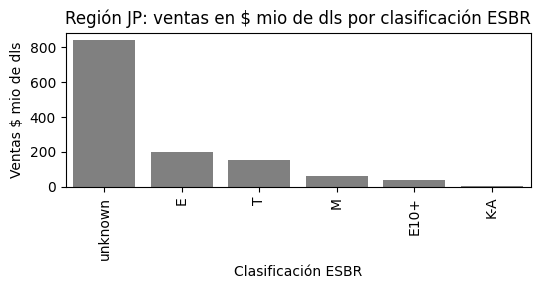

In [292]:
# 7 Ventas por clasificación ESBR  por región

# JP

jp_vtas_esbr = jp_juegos.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()

print('Ventas por clasificación ESBR de la región JP:')
print()
print(jp_vtas_esbr)
print()

plt.figure(figsize=(6,2))
sns.barplot(x= jp_vtas_esbr['rating'], y= jp_vtas_esbr['jp_sales'], color='gray')
plt.xlabel('Clasificación ESBR', fontsize=10)
plt.ylabel('Ventas $ mio de dls')
plt.title('Región JP: ventas en $ mio de dls por clasificación ESBR')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

**5.5 Perfiles de usuarios y ventas**

**Top 5 plataformas por región:**

* Norteamérica: X360, PS2, Wii, PS3, DS
* Europa: PS2, PS3, X360, Wii, PS
* Japón: DS, PS, PS2, SNES, 3DS

**Top 5 géneros por región:**

* Norteamérica: Action, Sports, Shooter, Platform, Misc
* Europa: Action, Sports, Shooter, Racing, Misc
* Japón: Role-Playing, Action, Sports, Platform, Misc

**Top 5 plataformas – género con mayor venta en la historia:**

* Norteamérica: X360-Shooter, Wii-Sports, X360-Action, PS2-Sports, PS2-Action
* Europa: PS3-Action, Wii-Sports, X360-Shooter, X360-Action, PS3-Shooter
* Japón: DS-Role-Playing, 3DS-Role-Playing, PS-Role-Playing, DS-Misc, PS2-Role-Playing

**Comentarios por zona de perfiles de usuarios:**

* Norteamérica: tendencia a plataformas de desarrollo local (X360) y juegos de géneros de “Action”, “Shooter” y “Sports”, al ser la zona con mayor participación de mercado, los juegos y plataformas que cumplan con estas características tendrán mayor tendencia al éxito.
* Europa: tendencia al consumo a las consolas de origen americano y japones, los géneros predilectos son “Action”, “Sports” y “Shooter”, un perfil parecido al norteamericano, pero con más tendencia a las plataformas de origen asiático.
* Japón: tendencia fuertemente inclinada a las plataformas de desarrollo local, y de la misma forma hacia el género “Role-Playing” el cual es el de mayor preferencia a través de las generaciones de consolas. Este género de juegos puede llegar a vender el doble que cualquier otro en el país.

**Ventas por clasificación ESBR:**

* Norteamérica: “E” (Everyone) es la clasificación con mayores ventas, y en segundo lugar “unknown” (no se cuenta con la clasificación registrada)
* Europa: “E” (Everyone) es la clasificación con mayores ventas, y en segundo lugar “unknown” (no se cuenta con la clasificación registrada)
* Japón: “unknown” en esta zona es donde la mayoría de los casos de clasificación desconocida se presenta, es posible que se deba a que la ESBR es un organismo norteamericano para la clasificación y existe una cantidad importante de juegos que solo son lanzados en Japón sin llegar a América.


# **6. Pruebas de hipótesis**

**6.1 Prueba hipótesis: user_score Xbox One & PC**

**"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."**

* **Hipótesis nula = "Las calificaciones promedio otorgadas por los usuarios de la plataformas Xbox One y PC son las mismas”**

* **Hipótesis alternativa = "Las calificaciones promedio otorgadas por los usuarios de la plataformas Xbox One y PC son significativamente diferentes”**

La hipótesis nula se formula asumiendo que las calificaciones de usuario son iguales (no hay cambios) entre las dos variables. La hipótesis alternativa establece la posible variación.

Se aplica una prueba de Levene para verificar la diferencia entre las varianzas.

Se define una prueba de dos colas de variables independientes ya que ninguna variable tiene influencia sobre la otra.

In [293]:
# calculo de calificaciones de ususarios promedio de Xbox One y PC

# Filtro de datos para xone y pc

xone_games = games[games['platform']=='XOne']

pc_games = games[games['platform']=='PC']

# Media y Varianza

xone_user_mean = xone_games['user_score'].mean()

pc_user_mean = pc_games['user_score'].mean()

xone_user_var = np.var(xone_games['user_score'])

pc_user_var = np.var(pc_games['user_score'])

print('Media user_score de Xbox One:', xone_user_mean)
print('Media user_score de PC:', pc_user_mean)
print('Varianza user_score de Xbox One:', xone_user_var)
print('Varianza user_score de PC:', pc_user_var)

Media user_score de Xbox One: 6.7615384615384615
Media user_score de PC: 7.16170431211499
Varianza user_score de Xbox One: 1.5664154469012772
Varianza user_score de PC: 1.8940262534310977


In [299]:
# Prueba de Levene para comparación de varianzas

print('Prueba de Levene para comparación de varianzas:')

print()

alpha= 0.05

# Realizar la prueba
stat, p = st.levene(xone_games['user_score'], pc_games['user_score'])

# Imprimir los resultados
print('Estadístico de prueba:', stat)
print('Valor p:', p)

# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.

if p < alpha:
    print('Las varianzas son significativamente diferentes')
else:
    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:

Estadístico de prueba: 0.39778738549699233
Valor p: 0.5283523839400621
Las varianzas NO son significativamente diferentes


In [295]:
# Prueba las hipótesis

stat, p = st.ttest_ind(xone_games['user_score'], pc_games['user_score'], equal_var=True)  #  Las varianzas NO son diferentes

print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if p < alpha:
    print('Rechazamos la hipótesis nula: "Las calificaciones promedio otorgadas por los usuarios de la plataformas Xbox One y PC son las mismas”')
else:
    print('No podemos rechazar la hipótesis nula: "Las calificaciones promedio otorgadas por los usuarios de la plataformas Xbox One y PC son las mismas”')

Estadístico de prueba: -4.151408185237929
Valor p: 3.534136669437999e-05

Rechazamos la hipótesis nula: "Las calificaciones promedio otorgadas por los usuarios de la plataformas Xbox One y PC son las mismas”


**6.2 Prueba la hipótesis: user_score Sports & Action**

**"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."**

* **Hipótesis nula = "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales”**

* **Hipótesis alternativa = "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes”**

La hipótesis nula se formula asumiendo que las calificaciones de usuario son iguales (no hay cambios) entre las dos variables. La hipótesis alternativa establece la posible variación.

Se aplica una prueba de Levene para verificar la diferencia entre las varianzas.

Se define una prueba de dos colas de variables independientes ya que ninguna variable tiene influencia sobre la otra.


In [296]:
# Filtro de datos para los géneros Sports y Action

sports_games = games[games['genre']=='Sports']

action_games = games[games['genre']=='Action']

# Media y Varianza

sports_user_mean = sports_games['user_score'].mean()

action_user_mean = action_games['user_score'].mean()

sports_user_var = np.var(sports_games['user_score'])

action_user_var = np.var(action_games['user_score'])

print('Media user_score del género "Sports":', sports_user_mean)
print('Media user_score del género "Action":', action_user_mean)
print('Varianza user_score del género "Sports":', sports_user_var)
print('Varianza user_score del género "Action":', action_user_var)

Media user_score del género "Sports": 7.193867120954002
Media user_score del género "Action": 7.21208073612348
Varianza user_score del género "Sports": 1.2665978222068732
Varianza user_score del género "Action": 1.1327154390144776


In [300]:
# Prueba de Levene para comparación de varianzas

print('Prueba de Levene para comparación de varianzas:')

print()


alpha= 0.05


# Realizar la prueba

stat, p = st.levene(sports_games['user_score'], action_games['user_score'])


# Imprimir los resultados

print('Estadístico de prueba:', stat)

print('Valor p:', p)


# Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que las varianzas son significativamente diferentes.


if p < alpha:

    print('Las varianzas son significativamente diferentes')

else:

    print('Las varianzas NO son significativamente diferentes')

Prueba de Levene para comparación de varianzas:

Estadístico de prueba: 0.10883163968262541
Valor p: 0.7414903291421946
Las varianzas NO son significativamente diferentes


In [298]:
# Prueba las hipótesis

stat, p = st.ttest_ind(sports_games['user_score'], action_games['user_score'], equal_var=True)  #  Las varianzas NO son diferentes

print('Estadístico de prueba:', stat)
print('Valor p:', p)
print()

# Si el "valor p" es menor a "alpha" rechazaremos la hipótesis

if p < alpha:
    print('Rechazamos la hipótesis nula: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales”')
else:
    print('No podemos rechazar la hipótesis nula: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales”')

Estadístico de prueba: -0.6215584341142232
Valor p: 0.5342570517131008

No podemos rechazar la hipótesis nula: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales”


# **7. Conclusiones**

**Proyecto:** Análisis del mercado de videojuegos.

**Objetivo:** Definir los patrones para determinar si un juego puede tener éxito o no para ayudar en las proyecciones de inversiones comerciales de ventas y publicidad.

**Resultados:**

Los patrones para definir si un juego tendrá éxito o no resultarán de la combinación de decisiones y alcance de acuerdo con la siguiente matriz:


**Mercado objetivo – Plataforma – Género – Rating (ESBR)**


**Mercado objetivo:** es importante definir cuál es el mercado objetivo en la etapa de la planeación del juego, el mercado obvio es el norteamericano, sin embargo, en este existe una gran oferta de títulos en consecuencia una mayor competencia. La planeación correcta del mercado objetivo ayudara a simplificar el alcance del juego tanto en ventas como en penetración del mercado correcto.

**Plataforma:** usualmente las plataformas recientes tienen un tiempo de vida entre 10 y 12 años, encontrando su mejor éxito en la primera mitad de este periodo. Identificar el momento de vida y la penetración de mercado que está teniendo la plataforma objetivo ayudara a tener un mayor periodo de exposición del juego, así como de escalada de ventas. De igual forma la selección de la plataforma va de la mano con el punto anterior, es decir, seleccionar la plataforma mas adecuada para el mercado objetivo sumara al éxito del juego.

**Género:** con los géneros “Action”, Shooter” y “Sports” pueden ser un acierto para tener éxito en zonas como Norteamérica y Europa, y por otra parte los “Role-Playing” son la apuesta segura para el mercado Japonés. En consecuencia, de las decisiones tomadas en los puntos anteriores y en la planeación del juego se puede estimar una mejor probabilidad de éxito con estos géneros.

**Rating (ESBR):** en Norteamérica y Europa los juegos “M” y “E” suelen tener más éxito, en el mercado japonés donde la ESBR no tiene tanta influencia puede ser una oportunidad para tener un diseño de juego mas libre, cuidando las reglas de censura locales que pueda tener este mercado.

**Procesamiento de la información:**

* Se recibió y analizó la base datos con la información necesaria para el proyecto, estudiando y entendiendo el contenido de cada una de las columnas. Estableciendo posibles opciones para el tratamiento de la información faltante u omisa.
* Se revisaron y corrigieron formatos, valores duplicados y valores ausentes.
* Se enriqueció cada dataset con información importante para los posteriores análisis.

**Análisis de la información:**

* Se utilizaron gráficas de barras, líneas, histogramas, de caja para la visualización y comprensión de la información por cada concepto, aplicando los filtros necesarios para cada caso.
* Se aplicaron estudios estadísticos: media, mediana, varianza, desviación estándar, coeficiente de correlación para cada concepto de análisis.
* Se realizaron pruebas de hipótesis para las preguntas planteadas.
Se elaboraron comentarios en cada etapa y paso del proceso realizado en el presente proyecto, identificando las áreas de oportunidad y aplicando acciones de mejora en cada una de estas.
